### Names: Patricio Aguilar, Maria José Reibán, María Emilia Guerra 
### Group: 4
### Proyect Submission 1 

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.stats import levene
from scipy.stats import shapiro, probplot
from scipy.stats import kstest, anderson, norm
from scipy.stats import chi2_contingency, norm, kstest
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel


import matplotlib.pylab as plt

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy.stats import levene
from scipy.stats import shapiro, probplot
from scipy.stats import kstest, anderson, norm
from scipy.stats import chi2_contingency, norm, kstest
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel


import matplotlib.pylab as plt

In [3]:
df = pd.read_csv("cardiovascular_disease.csv", encoding='ISO-8859-1') 
#Using this to read the encoding to ensure that the bytes are correctly interpreted as characters.
df


C:\Users\Personal\AppData\Local\Temp\ipykernel_15148\939361447.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cardiovascular_disease.csv", encoding='ISO-8859-1')


,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,25-29,168,81.65,29.05,No,4,30,8,0
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,65-69,180,69.85,21.48,No,8,15,60,4
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,"Yes, but female told only during pregnancy",No,Female,30-34,157,61.23,24.69,Yes,4,40,8,4
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,65-69,183,79.38,23.73,No,3,30,12,0


# 1.1 Give a general description of the database, including size, data types, null/blank values, outliers, atypical values.

In [4]:
df.shape #shape function lets us know how many rows and columns are in that order respectively 

(308854, 19)

In [5]:
df.head() #The .head code is to display the first few rows of a DataFrame.

,General_Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol Consumption,Fruit Consumption,Green_Vegetables_Consumption,FriedPotato Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


In [6]:
df.columns # We use this code to see the columns and their names which are the variables that are within the DF

Index(['General_Health', 'Checkup', 'Exercise', 'Heart Disease', 'Skin Cancer',
       'Other Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age Category', 'Height (cm)', 'Weight (kg)', 'BMI', 'Smoking History',
       'Alcohol Consumption', 'Fruit Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato Consumption'],
      dtype='object')

Note that some column titles end with spaces and some consist of two space separated words. For further analysis it's more convenient to have column names which are single words. We therefore strip trailing spaces and replace the remaining spaces with an underscore _. Instead of using the rename method, we create a modified copy of columns and assign to the columns field of the dataframe.

In [7]:
# strip removes the spaces before and after the word and the code .replace is uso to insert the underscore in between each variable instead of a space. 
#The reason for this is only due to order purposes

df.columns = [s.strip().replace(' ', '_') for s in df.columns]
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [8]:
df.dtypes #Check what type of data is in each variable 

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption               int64
Fruit_Consumption                object
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object

In [9]:
#To show the null values whithin each variable

print("Nulls:\n",df.isnull().sum(), "\n")

Nulls:
 General_Health                     0
Checkup                            0
Exercise                         101
Heart_Disease                      0
Skin_Cancer                        0
Other_Cancer                       0
Depression                      3088
Diabetes                           0
Arthritis                          0
Sex                                0
Age_Category                       0
Height_(cm)                        0
Weight_(kg)                        0
BMI                                0
Smoking_History                    0
Alcohol_Consumption                0
Fruit_Consumption                  0
Green_Vegetables_Consumption       0
FriedPotato_Consumption            0
dtype: int64 



In [10]:
#Describe the info of each column to see if there are any inconsistencies in the data 
print("Description:\n",df.describe(), "\n")

Description:
          Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.653639      83.588655      28.676831             5.096366   
std        11.001476      21.343210      13.136633             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.870000             6.000000   
max       365.000000     293.020000    4000.000000            30.000000   

       Green_Vegetables_Consumption  FriedPotato_Consumption  
count                 308854.000000            308854.000000  
mean                      15.110441                 6.296616  
std                       14.926238                 8.582954  
min                        0.000000                 0.0000

There is an inconsistency in the BMI data because the max value is to far away from the mean we will take this into considera
tion to eliminate it when cleaning the data

In [11]:
#We use unique to see the outliar values in each variable this are all response variables 

print("Valores unicos General_Health:", df["General_Health"].unique())
print("Valores unicos Checkup:", df["Checkup"].unique())
print("Valores unicos Exercise:", df["Exercise"].unique())
print("Valores unicos Skin_Cancer:", df["Skin_Cancer"].unique())
print("Valores unicos Other_Cancer:", df["Other_Cancer"].unique())
print("Valores unicos Depression:", df["Depression"].unique())
print("Valores unicos Diabetes:", df["Diabetes"].unique())
print("Valores unicos Arthritis:", df["Arthritis"].unique())
print("Valores unicos Sex:", df["Sex"].unique())
print("Valores unicos Age_Category:", df["Age_Category"].unique())
print("Valores unicos Height_(cm):", df["Height_(cm)"].unique())
print("Valores unicos Weight_(kg):", df["Weight_(kg)"].unique())
print("Valores unicos BMI:", df["BMI"].unique())
print("Valores unicos Smoking_History:", df["Smoking_History"].unique())
print("Valores unicos Alcohol_Consumption:", df["Alcohol_Consumption"].unique())
print("Valores unicos Fruit_Consumption:", df["Fruit_Consumption"].unique())
print("Valores unicos Green_Vegetables_Consumption:", df["Green_Vegetables_Consumption"].unique())
print("Valores unicos FriedPotato_Consumption:", df["FriedPotato_Consumption"].unique())


Valores unicos General_Health: ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Valores unicos Checkup: ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Valores unicos Exercise: ['No' 'Yes' nan]
Valores unicos Skin_Cancer: ['No' 'Yes' 'dsfg' 'wet' '12*lkl\x96«fg' 'q345345' 'serter-89' 'dfg 025'
 'dfgkl\x96fg-' 'sertret-8']
Valores unicos Other_Cancer: ['No' 'Yes' 'dsgw45']
Valores unicos Depression: ['No' 'Yes' nan]
Valores unicos Diabetes: ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Valores unicos Arthritis: ['Yes' 'No']
Valores unicos Sex: ['Female' 'Male' 'Non-Binary']
Valores unicos Age_Category: ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
Valores unicos Height_(cm): [150 165 163 180 191 183 175 160 168 178 152 157 188 185 170 173 155 193
 196 206 198 140 135 145 147 142 201 218 124 203 137 122 216 224 229 151

The variable Skin_Cancer has data like 'dsfg' 'wet' '12*lkl\x96«fg' 'q345345' 'serter-89' 'dfg 025' This are data that doesnt have any type of significance therefore we procede to eliminate them. and most variables have values that can be errase if their weight is not significant. 

In [12]:
#This code is to see what type of data is in our response variable 

print("Valores unicos Heart_Disease:", df["Heart_Disease"].unique()) 


Valores unicos Heart_Disease: ['No' 'Yes' 'e']


CLEANING DATA

# 1.2 Detail the criteria used to detect outliers, and how where the outliers and null values handled (if applicable): What was done with them? Why? etc. 

In [13]:
#We eliminate data that doesn´t need to be in the variable Skin_Cancer 
#and we check if the data is correctly cleaned 
#we use different variable names in order for the data to be organized. 

df_clean=df[df["Skin_Cancer"]!="dsfg"]
df_clean1=df_clean[df_clean["Skin_Cancer"]!="wet"]
df_clean2=df_clean1[df_clean1["Skin_Cancer"]!="12*lkl\x96«fg"]
df_clean3=df_clean2[df_clean2["Skin_Cancer"]!="q345345"]
df_clean4=df_clean3[df_clean3["Skin_Cancer"]!="serter-89"]
df_clean5=df_clean4[df_clean4["Skin_Cancer"]!="dfg 025"]
df_clean6=df_clean5[df_clean5["Skin_Cancer"]!="dfgkl\x96fg-"]
df_clean7=df_clean6[df_clean6["Skin_Cancer"]!="sertret-8"]

print("Unique values Skin_Cancer:", df_clean7["Skin_Cancer"].unique())


Unique values Skin_Cancer: ['No' 'Yes']


In [14]:
#Cleaning data that doesnt need to be in the variable Other_Cancer
df_clean8=df_clean7[df_clean7["Other_Cancer"]!="dsgw45"]

print("Valores unicos Other_Cancer:", df_clean8["Other_Cancer"].unique())

Valores unicos Other_Cancer: ['No' 'Yes']


In [15]:
#Code to check How many non binary values there are 
Non_Binary_values = df['Sex'].value_counts().index
print("Non-Binary values:", Non_Binary_values)
print("Number of non-binary values:", len(Non_Binary_values))
#We decide to eliminate the non binary values because there are 3 values in 308854 data

Non-Binary values: Index(['Female', 'Male', 'Non-Binary'], dtype='object')
Number of non-binary values: 3


In [16]:
#Cleaning data that doesnt need to be in the variable sex
df_clean9=df_clean8[df_clean8["Sex"]!="Non-Binary"]

print("Valores unicos Sex:", df_clean9["Sex"].unique())

Valores unicos Sex: ['Female' 'Male']


In [17]:
#Checking the number of nan values within the excercise variable because it was one of the two vzariables that contained null values 
#the other variable that contained nulls was depression. 

nan = df_clean9["Exercise"].value_counts().get('nan', 0)
print("Number of 'nan' values:", nan)

#the number of nan values are 101 which are not representable in a sample of 308854
df_clean10=df_clean9[df_clean9["Exercise"]!="nan"]
print ("Number of 'nan' values after clean:",df_clean10["Exercise"].value_counts().get('nan', 0))


Number of 'nan' values: 0
Number of 'nan' values after clean: 0


In [18]:
#As we saw before the BMI variable had a maximun value that wasnt representable and makes no sense so we eliminate any value that is 
#higher than 70 which is a very high value that a person can have.

df_clean11=df_clean10[df_clean10["BMI"]<=70]


In [19]:
#This is a variable that was register with numbers that is why if there is a yes no answer and the number of 
#variables with this is not representable then we drop them.

yes_count = df_clean11["Fruit_Consumption"].value_counts().get('Yes', 0)
no_count = df_clean11["Fruit_Consumption"].value_counts().get('No', 0)

print("Number of 'No' values:", no_count)
print("Number of 'Yes' values:", yes_count)


df_clean12=df_clean11[df_clean11["Fruit_Consumption"]!="No"]
print ("Number of 'No' values after clean:",df_clean12["Fruit_Consumption"].value_counts().get('No', 0))

df_clean13=df_clean12[df_clean12["Fruit_Consumption"]!="Yes"]
print ("Number of 'Yes' values after clean:",df_clean13["Fruit_Consumption"].value_counts().get('Yes', 0))


Number of 'No' values: 4
Number of 'Yes' values: 3
Number of 'No' values after clean: 0
Number of 'Yes' values after clean: 0


In [20]:
#Checking Diabetes numbers for the uncommun data 

pregnancy_count = df_clean13["Diabetes"].value_counts().get('Yes, but female told only during pregnancy', 0)

print("Yes, but female told only during pregnancy", pregnancy_count)

#we see that the amount of data with this cathegory within diabetes is high so we will not eliminate it.


Yes, but female told only during pregnancy 2643


In [21]:
#Checking diabetes numbers for other cathegories 
prediabetes_count = df_clean13["Diabetes"].value_counts().get('No, pre-diabetes or borderline diabetes', 0)

#we see that the amount of data with this cathegory within diabetes is high so we will not eliminate it.

print("No, pre-diabetes or borderline diabetes", prediabetes_count)


No, pre-diabetes or borderline diabetes 6880


In [22]:
import pandas as pd


# Count the occurrences of the letter 'e' in the "Heart_Disease" column
count_of_e = df['Heart_Disease'].str.count('e').sum()


# Print the result
print(f'The number of "e" in the "Heart_Disease" column is: {count_of_e}')

#We have doubts about the significance of this variable so we plot a histogram to see if the e value is significant 

The number of "e" in the "Heart_Disease" column is: 24972


<Axes: xlabel='Heart_Disease', ylabel='Count'>

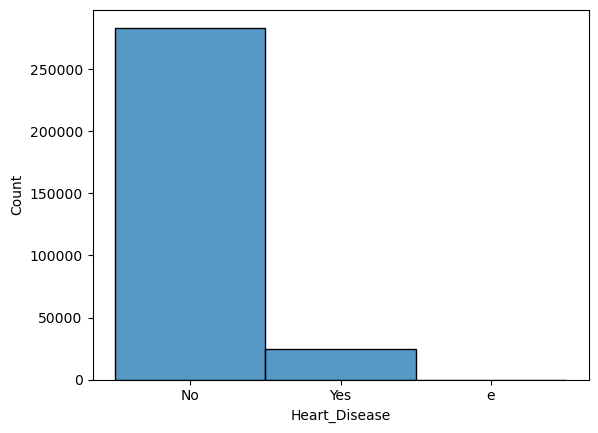

In [23]:
sns.histplot(df_clean13['Heart_Disease']) #graphically the e value is not significant so we proceed to eliminate it 

In [24]:
df_clean13.shape 
#Now the data has less numbers before we had (308437, 19)

(308437, 19)

We proceed to see every variable in a graphic manner to check if the data is propertly cleaned and to help with the visual analysis

<Axes: xlabel='General_Health', ylabel='Count'>

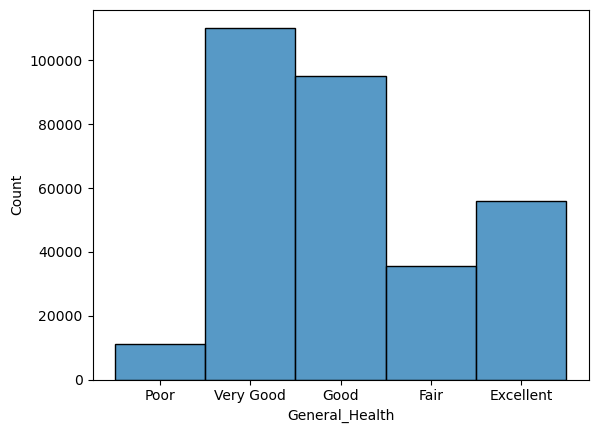

In [25]:

# Now, 'General_Health' is a numeric variable
sns.histplot(df_clean13['General_Health'])


<Axes: xlabel='Exercise', ylabel='Count'>

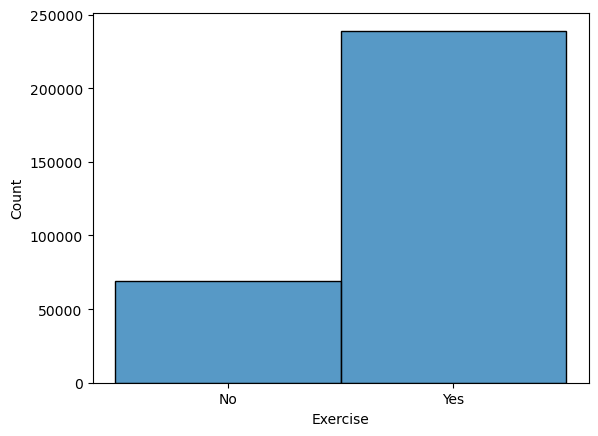

In [26]:
sns.histplot(df_clean13['Exercise'])

<Axes: xlabel='Skin_Cancer', ylabel='Count'>

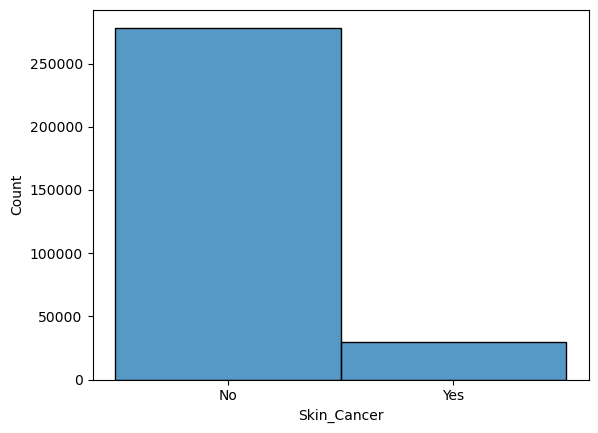

In [27]:
# Assuming 'General_Health' contains both numerical and non-numerical values


sns.histplot(df_clean13['Skin_Cancer'])


<Axes: xlabel='Other_Cancer', ylabel='Count'>

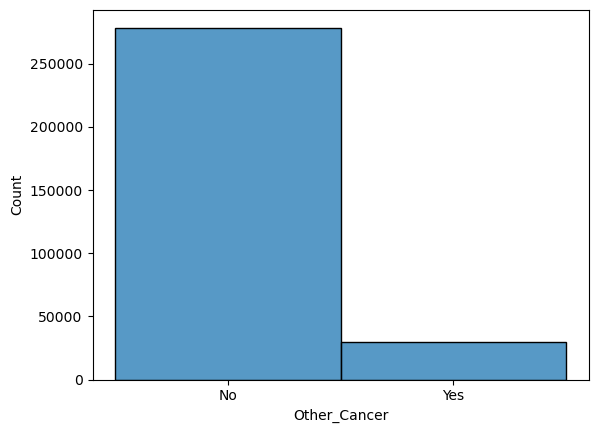

In [28]:
# Assuming 'General_Health' contains both numerical and non-numerical values

sns.histplot(df_clean13['Other_Cancer'])

<Axes: xlabel='Depression', ylabel='Count'>

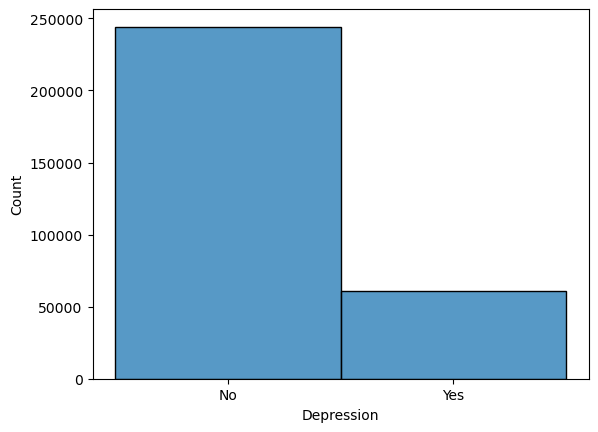

In [29]:
sns.histplot(df_clean13['Depression'])

<Axes: xlabel='Diabetes', ylabel='Count'>

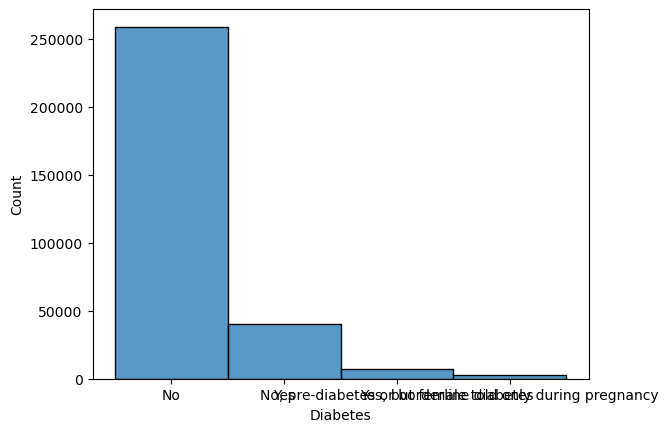

In [30]:
sns.histplot(df_clean13['Diabetes'])

<Axes: xlabel='Arthritis', ylabel='Count'>

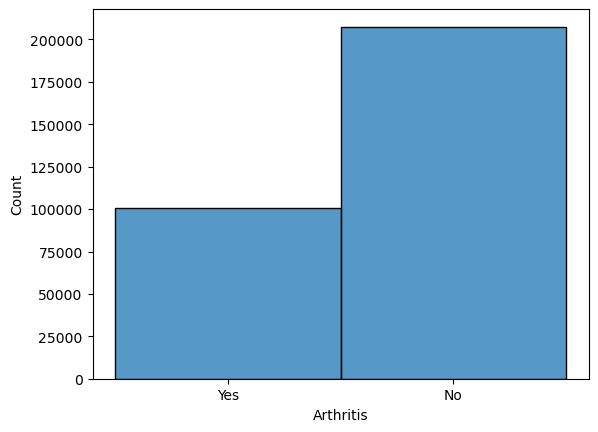

In [31]:
sns.histplot(df_clean13['Arthritis'])

<Axes: xlabel='Sex', ylabel='Count'>

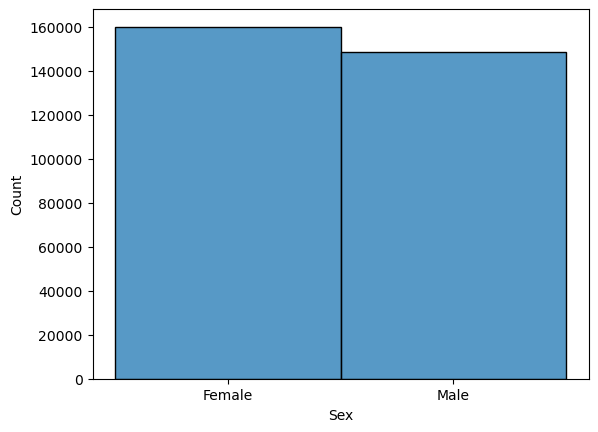

In [32]:
sns.histplot(df_clean13['Sex'])

C:\Users\Personal\AppData\Local\Temp\ipykernel_15148\1096593511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean13["Age_Category"] = df_clean13["Age_Category"].replace({


<Axes: xlabel='Age_Category', ylabel='Count'>

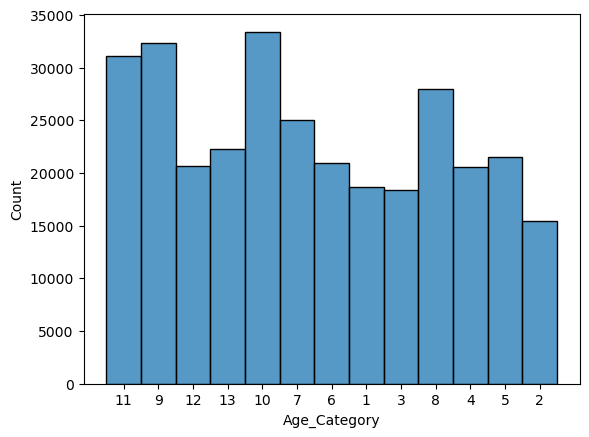

In [33]:
df_clean13["Age_Category"] = df_clean13["Age_Category"].replace({
   
     "80+": "13",
    "75-79": "12",
    "70-74": "11",
    "65-69": "10",
    "60-64": "9",
    "55-59": "8",
    "50-54": "7",
    "45-49": "6",
    "40-44": "5",
    "35-39": "4",
    "30-34": "3",
    "25-29": "2",
    "18-24": "1"
})

sns.histplot(df_clean13['Age_Category'])

<Axes: xlabel='Height_(cm)', ylabel='Count'>

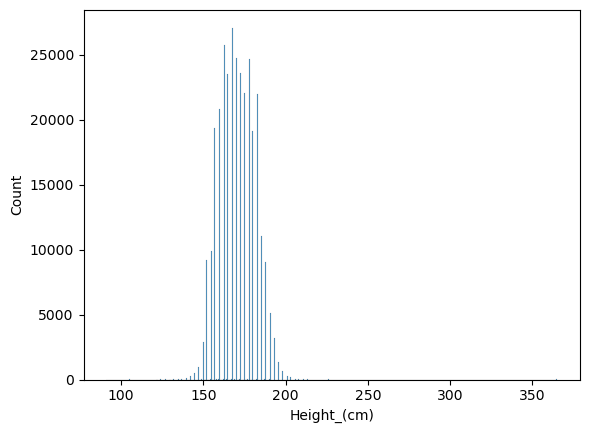

In [34]:
sns.histplot(df_clean13['Height_(cm)'])

<Axes: xlabel='Weight_(kg)', ylabel='Count'>

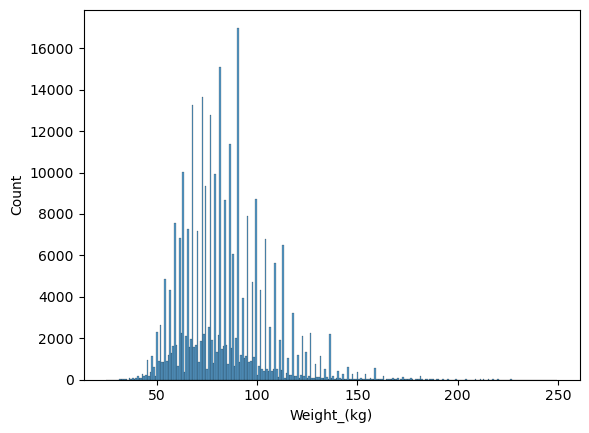

In [35]:
sns.histplot(df_clean13['Weight_(kg)'])

<Axes: xlabel='BMI', ylabel='Count'>

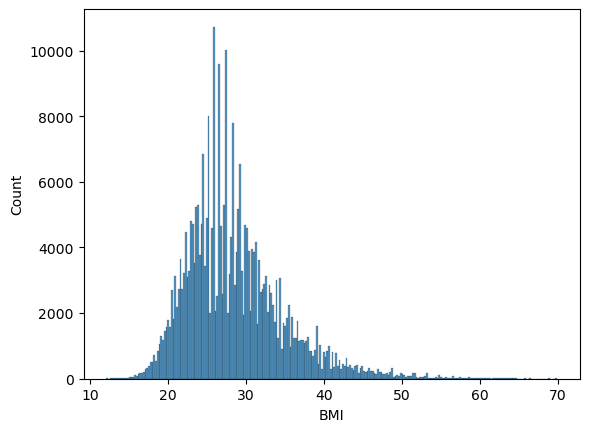

In [36]:
sns.histplot(df_clean13['BMI'])

<Axes: xlabel='Smoking_History', ylabel='Count'>

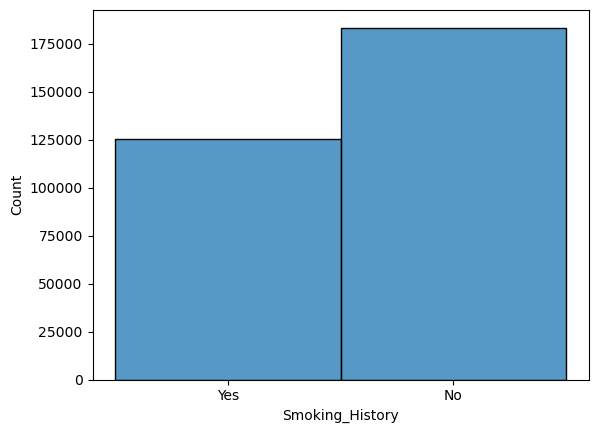

In [37]:
sns.histplot(df_clean13['Smoking_History'])

<Axes: xlabel='Alcohol_Consumption', ylabel='Count'>

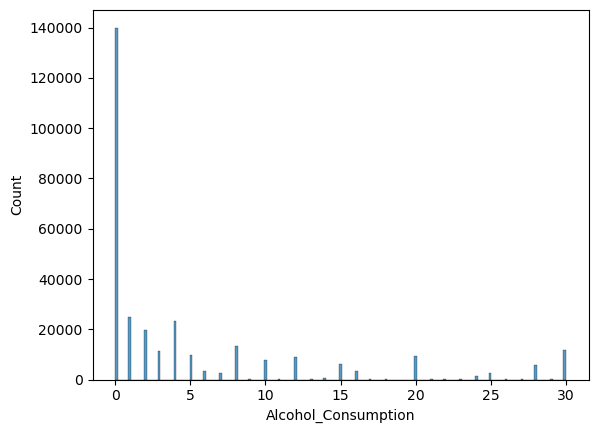

In [38]:
sns.histplot(df_clean13['Alcohol_Consumption'])

C:\Users\Personal\AppData\Local\Temp\ipykernel_15148\4001154309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean13['Fruit_Consumption'] = pd.to_numeric(df_clean13['Fruit_Consumption'], errors='coerce')


<Axes: xlabel='Fruit_Consumption', ylabel='Count'>

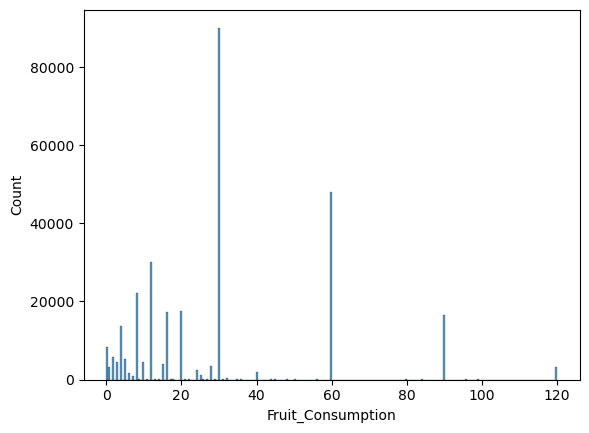

In [39]:
df_clean13['Fruit_Consumption'] = pd.to_numeric(df_clean13['Fruit_Consumption'], errors='coerce')
sns.histplot(df_clean13['Fruit_Consumption'].dropna())



<Axes: xlabel='Green_Vegetables_Consumption', ylabel='Count'>

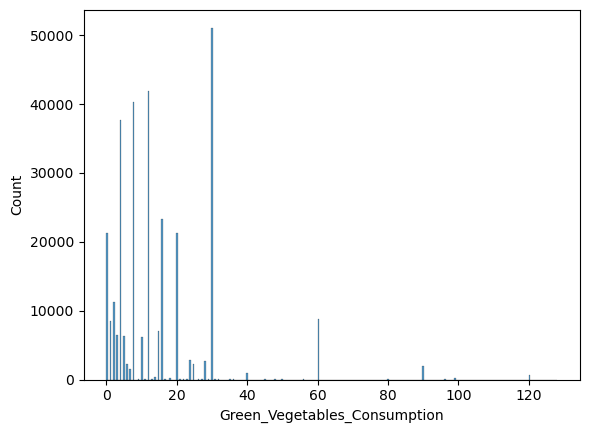

In [40]:
sns.histplot(df_clean13['Green_Vegetables_Consumption'])

<Axes: xlabel='FriedPotato_Consumption', ylabel='Count'>

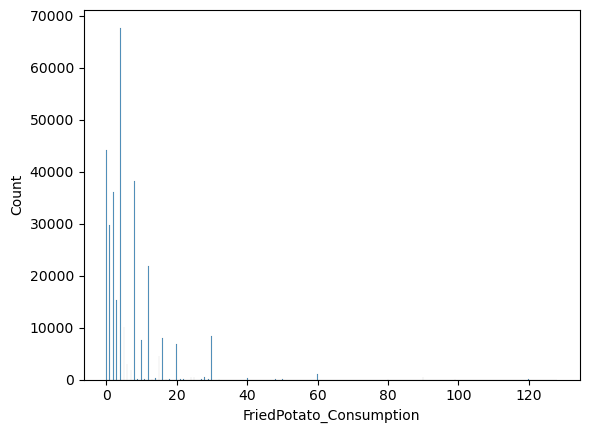

In [41]:
sns.histplot(df_clean13['FriedPotato_Consumption'])

# 1.2 Detail the criteria used to detect outliers, and how where the outliers and null values handled (if applicable): What was done with them? Why? etc.  


In [42]:
# GENERAL HEALTH 
# For categorical variables, we start by replacing each value with a numerical order in accordance to what they represent
# After this, we can handle null values

df_clean13["General_Health"] = df_clean13["General_Health"].replace({
    "Excellent": "5",
    "Very Good": "4",
    "Good": "3",
    "Fair": "2",
    "Poor": "1"
})

# CHECKUP
df_clean13["Checkup"] = df_clean13["Checkup"].replace({
    "5 or more years ago": "5",
    "Within the past 5 years": "4",
    "Within the past 2 years": "3",
    "Within the past year": "2",
    "Never": "1"
})

# Exercise
df_clean13["Exercise"] = df_clean13["Exercise"].replace({
    "Yes": "1",
    "No": "0"  
})

# Heart_Disease
df_clean13["Heart_Disease"] = df_clean13["Heart_Disease"].replace({
    "Yes": "1",
    "No": "0"  
})

# Skin_Cancer
df_clean13["Skin_Cancer"] = df_clean13["Skin_Cancer"].replace({
    "Yes": "1",
    "No": "0"  
})

# Other_Cancer
df_clean13["Other_Cancer"] = df_clean13["Other_Cancer"].replace({
    "Yes": "1",
    "No": "0"  
})

# Depression
df_clean13["Depression"] = df_clean13["Depression"].replace({
    "Yes": "1",
    "No": "0"  
})



# Arthritis
df_clean13["Arthritis"] = df_clean13["Arthritis"].replace({
    "Yes": "1",
    "No": "0"
})

# Smoking_History
df_clean13["Smoking_History"] = df_clean13["Smoking_History"].replace({
    "Yes": "1",
    "No": "0"
})

# Sex
df_clean13["Sex"] = df_clean13["Sex"].replace({
    "Female": "1",
    "Male": "0"
})

# GENERAL HEALTH 
# For categorical variables, we start by replacing each value with a numerical order in accordance to what they represent
# After this, we can handle null values

df_clean13["Age_Category"] = df_clean13["Age_Category"].replace({
    "80+": "13",
    "75-79": "12",
    "70-74": "11",
    "65-69": "10",
    "60-64": "9",
    "55-59": "8",
    "50-54": "7",
    "45-49": "6",
    "40-44": "5",
    "35-39": "4",
    "30-34": "3",
    "25-29": "2",
    "18-24": "1"
})

#Fruit_Consumption
df_clean13["Fruit_Consumption"] = df_clean13["Fruit_Consumption"].replace({
    "Yes": "1",
    "No": "0"
})


#Height


df_clean13["Height_(cm)"] = df_clean13["Height_(cm)"].astype(int)

#Weight 

df_clean13["Weight_(kg)"] = df_clean13["Weight_(kg)"].round()
df_clean13["Weight_(kg)"] = df_clean13["Weight_(kg)"].astype(int)

#BM1
df_clean13["BMI"] = df_clean13["BMI"].round()
df_clean13["BMI"] = df_clean13["BMI"].astype(int)

df_clean13

C:\Users\Personal\AppData\Local\Temp\ipykernel_15148\1066186787.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean13["General_Health"] = df_clean13["General_Health"].replace({
C:\Users\Personal\AppData\Local\Temp\ipykernel_15148\1066186787.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean13["Checkup"] = df_clean13["Checkup"].replace({
C:\Users\Personal\AppData\Local\Temp\ipykernel_15148\1066186787.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,3,0,0,0,0,0,No,1,1,11,150,33,15,1,0,30,16,12
1,4,2,0,1,0,0,0,Yes,0,1,11,165,77,28,0,0,30,0,4
2,4,2,1,0,0,0,0,Yes,0,1,9,163,88,33,0,4,12,3,16
3,1,2,1,1,0,0,0,Yes,0,0,12,180,93,29,0,0,30,30,8
4,3,2,0,0,0,0,0,No,0,0,13,191,88,24,1,0,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,2,1,0,0,0,0,No,0,0,2,168,82,29,0,4,30,8,0
308850,2,4,1,0,0,0,0,Yes,0,0,10,180,70,21,0,8,15,60,4
308851,4,5,1,0,0,0,1,"Yes, but female told only during pregnancy",0,1,3,157,61,25,1,4,40,8,4
308852,4,2,1,0,0,0,0,No,0,0,10,183,79,24,0,3,30,12,0


In [43]:
#Diabetes

#We create dummies for the variable "Diabetes"
Dummies = pd.get_dummies(df_clean13['Diabetes'])
df_clean14= pd.concat([df_clean13, Dummies], axis=1)

df_clean14

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,No,"No, pre-diabetes or borderline diabetes",Yes,"Yes, but female told only during pregnancy"
0,1,3,0,0,0,0,0,No,1,1,...,15,1,0,30,16,12,1,0,0,0
1,4,2,0,1,0,0,0,Yes,0,1,...,28,0,0,30,0,4,0,0,1,0
2,4,2,1,0,0,0,0,Yes,0,1,...,33,0,4,12,3,16,0,0,1,0
3,1,2,1,1,0,0,0,Yes,0,0,...,29,0,0,30,30,8,0,0,1,0
4,3,2,0,0,0,0,0,No,0,0,...,24,1,0,8,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,2,1,0,0,0,0,No,0,0,...,29,0,4,30,8,0,1,0,0,0
308850,2,4,1,0,0,0,0,Yes,0,0,...,21,0,8,15,60,4,0,0,1,0
308851,4,5,1,0,0,0,1,"Yes, but female told only during pregnancy",0,1,...,25,1,4,40,8,4,0,0,0,1
308852,4,2,1,0,0,0,0,No,0,0,...,24,0,3,30,12,0,1,0,0,0


In [44]:
#We eliminate the column "Diabetes" because it is information extra that we dont need 
df_clean15=df_clean14.drop(['Diabetes'],axis=1)

df_clean15

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Age_Category,...,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,No,"No, pre-diabetes or borderline diabetes",Yes,"Yes, but female told only during pregnancy"
0,1,3,0,0,0,0,0,1,1,11,...,15,1,0,30,16,12,1,0,0,0
1,4,2,0,1,0,0,0,0,1,11,...,28,0,0,30,0,4,0,0,1,0
2,4,2,1,0,0,0,0,0,1,9,...,33,0,4,12,3,16,0,0,1,0
3,1,2,1,1,0,0,0,0,0,12,...,29,0,0,30,30,8,0,0,1,0
4,3,2,0,0,0,0,0,0,0,13,...,24,1,0,8,4,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,2,1,0,0,0,0,0,0,2,...,29,0,4,30,8,0,1,0,0,0
308850,2,4,1,0,0,0,0,0,0,10,...,21,0,8,15,60,4,0,0,1,0
308851,4,5,1,0,0,0,1,0,1,3,...,25,1,4,40,8,4,0,0,0,1
308852,4,2,1,0,0,0,0,0,0,10,...,24,0,3,30,12,0,1,0,0,0


In [45]:
#We can see that we have now 22 columns which is the right number 

# 1.3 Explore the correlation between variables. Which variables seem to affect more the response variable and how? 

In [46]:
df_clean15.dtypes #we have to check what types of variables we have in order to make 

General_Health                                object
Checkup                                       object
Exercise                                      object
Heart_Disease                                 object
Skin_Cancer                                   object
Other_Cancer                                  object
Depression                                    object
Arthritis                                     object
Sex                                           object
Age_Category                                  object
Height_(cm)                                    int32
Weight_(kg)                                    int32
BMI                                            int32
Smoking_History                               object
Alcohol_Consumption                            int64
Fruit_Consumption                              int64
Green_Vegetables_Consumption                   int64
FriedPotato_Consumption                        int64
No                                            

In [47]:
non_numeric_values = pd.to_numeric(df_clean15['Heart_Disease'], errors='coerce').isnull()
print(df_clean15['Heart_Disease'][non_numeric_values])

127095    e
Name: Heart_Disease, dtype: object


In [48]:
df_clean15['Heart_Disease'] = df_clean15['Heart_Disease'].replace('e', '0')

In [49]:
df_clean16 = df_clean15.dropna(subset=['Heart_Disease'])


In [50]:
df_clean16['Heart_Disease'] = df_clean16['Heart_Disease'].astype(int)


In [51]:
df_clean16['General_Health'] = df_clean16['General_Health'].astype(int)

df_clean16['Checkup'] = df_clean16['Checkup'].astype(int)


df_clean16.dropna(subset=['Exercise']) 

df_clean16['Exercise'] = df_clean16['Exercise'].fillna(0).astype(int)

df_clean17= df_clean16.dropna(subset=['Exercise']).astype({'Exercise': int})

In [52]:

df_clean17['Other_Cancer'] = df_clean17['Other_Cancer'].astype(int)


df_clean17['Skin_Cancer'] = df_clean17['Skin_Cancer'].astype(int)

df_clean17['Depression'] = df_clean17['Depression'].fillna(0).astype(int)
df_clean18= df_clean17.dropna(subset=['Depression']).astype({'Depression': int})
df_clean18['Depression'] = df_clean18['Depression'].astype(int)

df_clean18['Arthritis'] = df_clean18['Arthritis'].astype(int)

df_clean18['Sex'] = df_clean18['Sex'].astype(int)

df_clean18['Age_Category'] = df_clean18['Age_Category'].astype(int)

df_clean18['Smoking_History'] = df_clean18['Smoking_History'].astype(int)

In [53]:

df_clean18['Fruit_Consumption'] = df_clean18['Fruit_Consumption'].astype(int)

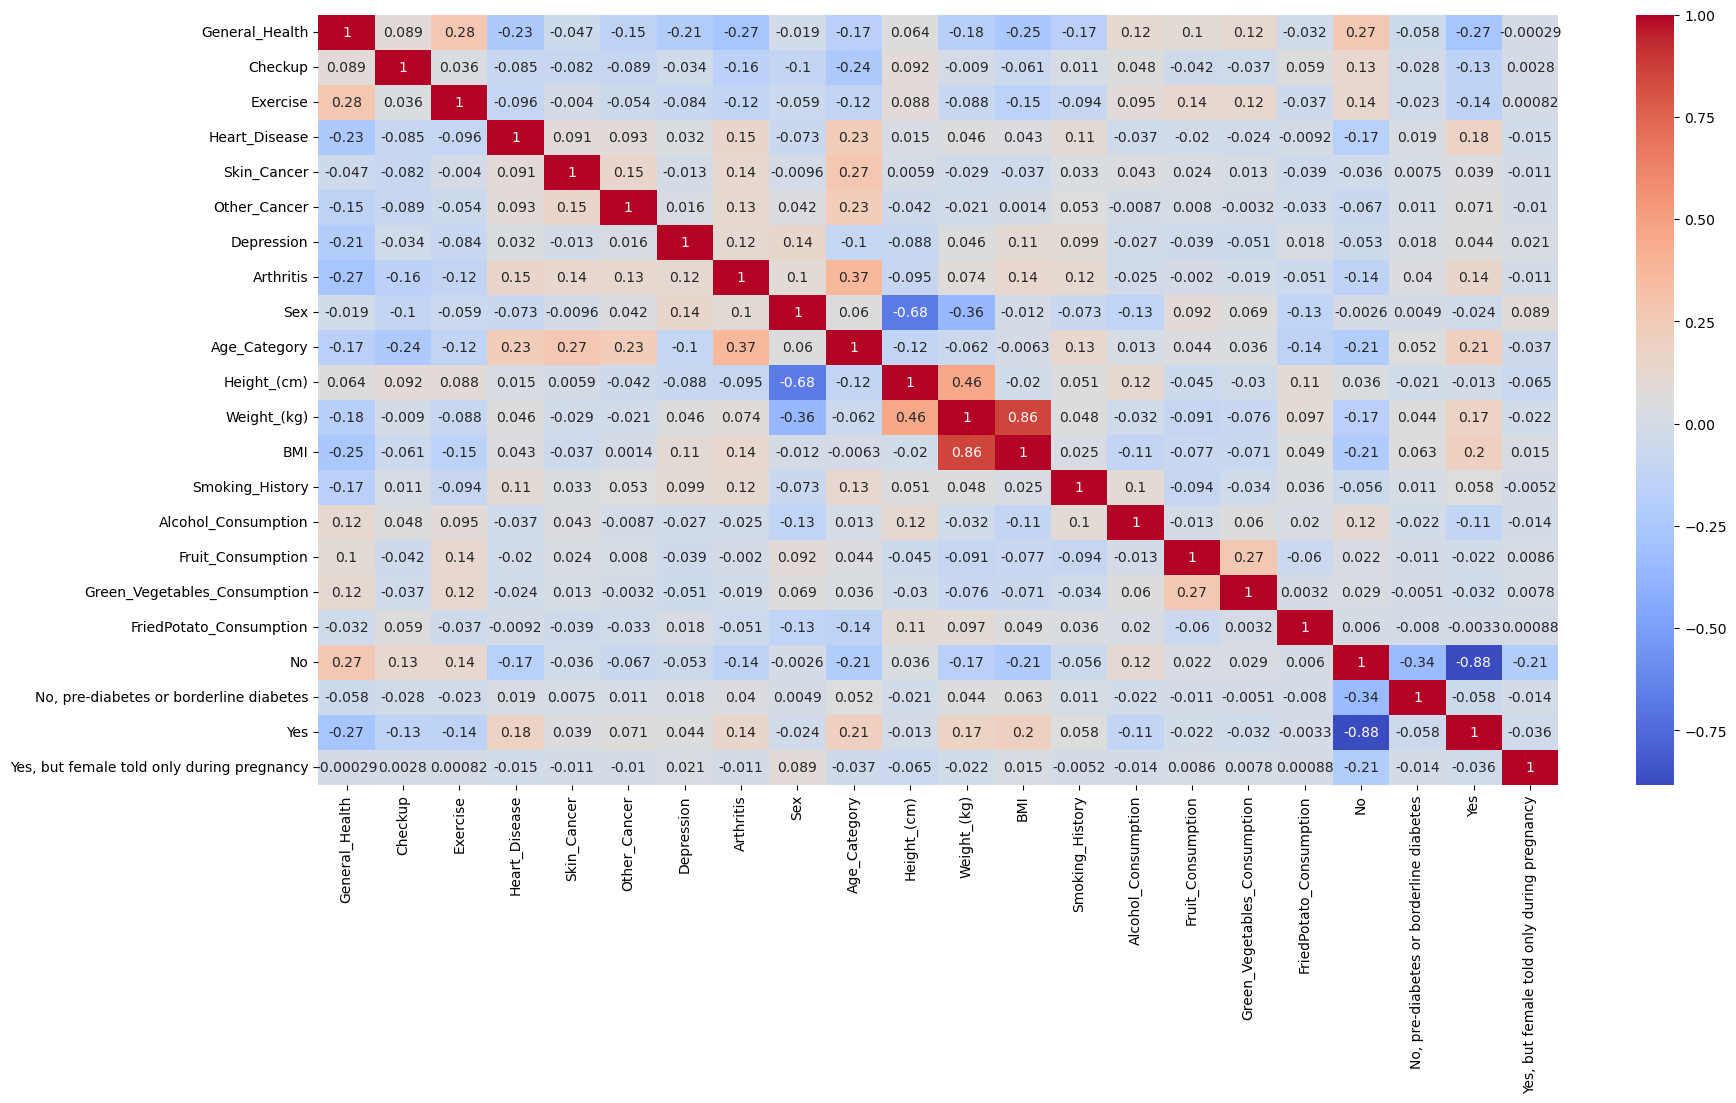

In [54]:
#A correlation Matrix is created 
corr_matrix = df_clean18.corr()

#The size of the graph is fitted to the data 
plt.figure(figsize=(20,10))

#The type of graph for the correlation is chosen
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

#The graph is shown
plt.show()

# 2.The dataset is unbalanced. Investigate what is an unbalanced dataset, the problems caused by this type of dataset, and at least 2 techniques that can be applied during training to reduce its effect. Use academic references for this investigation and cite them (papers or books, internet blogs are not acceptable)

In [55]:
#we have to check for colliniarity between variables if the dataset is unbalance, for that we will use the following code 
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X represents the independent variables, and y is the dependent variable


X = df_clean18[['Checkup', 'Exercise', "Skin_Cancer", "Other_Cancer","Depression", "Arthritis", "Sex","Age_Category","Height_(cm)",
       "Weight_(kg)", "BMI", "Smoking_History", "Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption",
       "FriedPotato_Consumption", "No", "No, pre-diabetes or borderline diabetes", "Yes", "Yes, but female told only during pregnancy"]]
y = df_clean18['Heart_Disease']

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X).fit()

# Print the summary to get insights into the model
print(model.summary())

# Check for collinearity using Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF data
print(vif_data)




                            OLS Regression Results                            
Dep. Variable:          Heart_Disease   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     1696.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:12:50   Log-Likelihood:                -21434.
No. Observations:              308437   AIC:                         4.291e+04
Df Residuals:                  308417   BIC:                         4.312e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

C:\Users\Personal\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Personal\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                      Variable        VIF
0                                        const   0.000000
1                                      Checkup   1.090681
2                                     Exercise   1.103763
3                                  Skin_Cancer   1.098073
4                                 Other_Cancer   1.073664
5                                   Depression   1.094115
6                                    Arthritis   1.240011
7                                          Sex   1.992590
8                                 Age_Category   1.465434
9                                  Height_(cm)   8.853961
10                                 Weight_(kg)  33.949058
11                                         BMI  26.749373
12                             Smoking_History   1.073626
13                         Alcohol_Consumption   1.065306
14                           Fruit_Consumption   1.114412
15                Green_Vegetables_Consumption   1.102592
16            

VIF values greater than 10 are often considered indicative of collinearity issues. So we will proceed to erase the two variables
with values grater thatn 10 which are weight and BMI

In [56]:
#the decision is to remove the weight vaiable 

df_clean19=df_clean18.drop(['Weight_(kg)'],axis=1)

In [57]:
#we have to check for colliniarity between variables if the dataset is unbalance, for that we will use the following code 
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# X represents the independent variables, and y is the dependent variable


X = df_clean19[['Checkup', 'Exercise', "Skin_Cancer", "Other_Cancer","Depression", "Arthritis", "Sex","Age_Category","Height_(cm)",
        "BMI", "Smoking_History", "Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption",
       "FriedPotato_Consumption", "No", "No, pre-diabetes or borderline diabetes", "Yes", "Yes, but female told only during pregnancy"]]
y = df_clean19['Heart_Disease']

# Add a constant term to the independent variables matrix
X = sm.add_constant(X)

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X).fit()

# Print the summary to get insights into the model
print(model.summary())

# Check for collinearity using Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF data
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:          Heart_Disease   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     1790.
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:13:06   Log-Likelihood:                -21437.
No. Observations:              308437   AIC:                         4.291e+04
Df Residuals:                  308418   BIC:                         4.311e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

C:\Users\Personal\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Personal\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                      Variable       VIF
0                                        const  0.000000
1                                      Checkup  1.090574
2                                     Exercise  1.103418
3                                  Skin_Cancer  1.098044
4                                 Other_Cancer  1.073585
5                                   Depression  1.093933
6                                    Arthritis  1.239950
7                                          Sex  1.941260
8                                 Age_Category  1.465386
9                                  Height_(cm)  1.881762
10                                         BMI  1.111535
11                             Smoking_History  1.073619
12                         Alcohol_Consumption  1.065296
13                           Fruit_Consumption  1.114399
14                Green_Vegetables_Consumption  1.102537
15                     FriedPotato_Consumption  1.047022
16                             

In [58]:
total_valores = df_clean1.size

# This will calculate the values in each column and the percentage it represents before the data was cleaned 
porcentaje_por_columna = (df_clean1.count() / total_valores) * 100

print("Porcentaje que cada columna aporta al conjunto de datos:")
print(porcentaje_por_columna)

Porcentaje que cada columna aporta al conjunto de datos:
General_Health                  5.263158
Checkup                         5.263158
Exercise                        5.261437
Heart_Disease                   5.263158
Skin_Cancer                     5.263158
Other_Cancer                    5.263158
Depression                      5.210535
Diabetes                        5.263158
Arthritis                       5.263158
Sex                             5.263158
Age_Category                    5.263158
Height_(cm)                     5.263158
Weight_(kg)                     5.263158
BMI                             5.263158
Smoking_History                 5.263158
Alcohol_Consumption             5.263158
Fruit_Consumption               5.263158
Green_Vegetables_Consumption    5.263158
FriedPotato_Consumption         5.263158
dtype: float64


In [59]:
total_valores = df_clean19.size

# This will calculate the values in each column and the percentage it represents after the data was cleaned
porcentaje_por_columna2 = (df_clean19.count() / total_valores) * 100

print("Porcentaje que cada columna aporta al conjunto de datos:")
print(porcentaje_por_columna2)

Porcentaje que cada columna aporta al conjunto de datos:
General_Health                                4.761905
Checkup                                       4.761905
Exercise                                      4.761905
Heart_Disease                                 4.761905
Skin_Cancer                                   4.761905
Other_Cancer                                  4.761905
Depression                                    4.761905
Arthritis                                     4.761905
Sex                                           4.761905
Age_Category                                  4.761905
Height_(cm)                                   4.761905
BMI                                           4.761905
Smoking_History                               4.761905
Alcohol_Consumption                           4.761905
Fruit_Consumption                             4.761905
Green_Vegetables_Consumption                  4.761905
FriedPotato_Consumption                       4.761905
No      

([<matplotlib.patches.Wedge at 0x2d1aaf77c10>,
 [Text(3.2631417136600733, 0.49183956385349903, 'General_Health'),
  Text(2.9731971515664197, 1.4318165727205883, 'Checkup'),
  Text(2.4190708830760483, 2.244570351460089, 'Exercise'),
  Text(1.649999476000115, 2.8578841350200586, 'Heart_Disease'),
  Text(0.734318323622311, 3.2172622833074276, 'Skin_Cancer'),
  Text(-0.2466102569896795, 3.290772459643402, 'Other_Cancer'),
  Text(-1.2056264264209509, 3.0718829599962705, 'Depression'),
  Text(-2.0575173598277434, 2.5800430837502453, 'Arthritis'),
  Text(-2.7265887830067017, 1.8589549775026923, 'Sex'),
  Text(-3.1533907431743153, 0.972690506205617, 'Age_Category'),
  Text(-3.299999999999501, -1.8151887530358864e-06, 'Height_(cm)'),
  Text(-3.153389673101579, -0.9726939752955791, 'BMI'),
  Text(-2.7265867379419206, -1.8589579770611377, 'Smoking_History'),
  Text(-2.05751452148396, -2.580045347253151, 'Alcohol_Consumption'),
  Text(-1.2056230469975562, -3.071884286321399, 'Fruit_Consumption'),


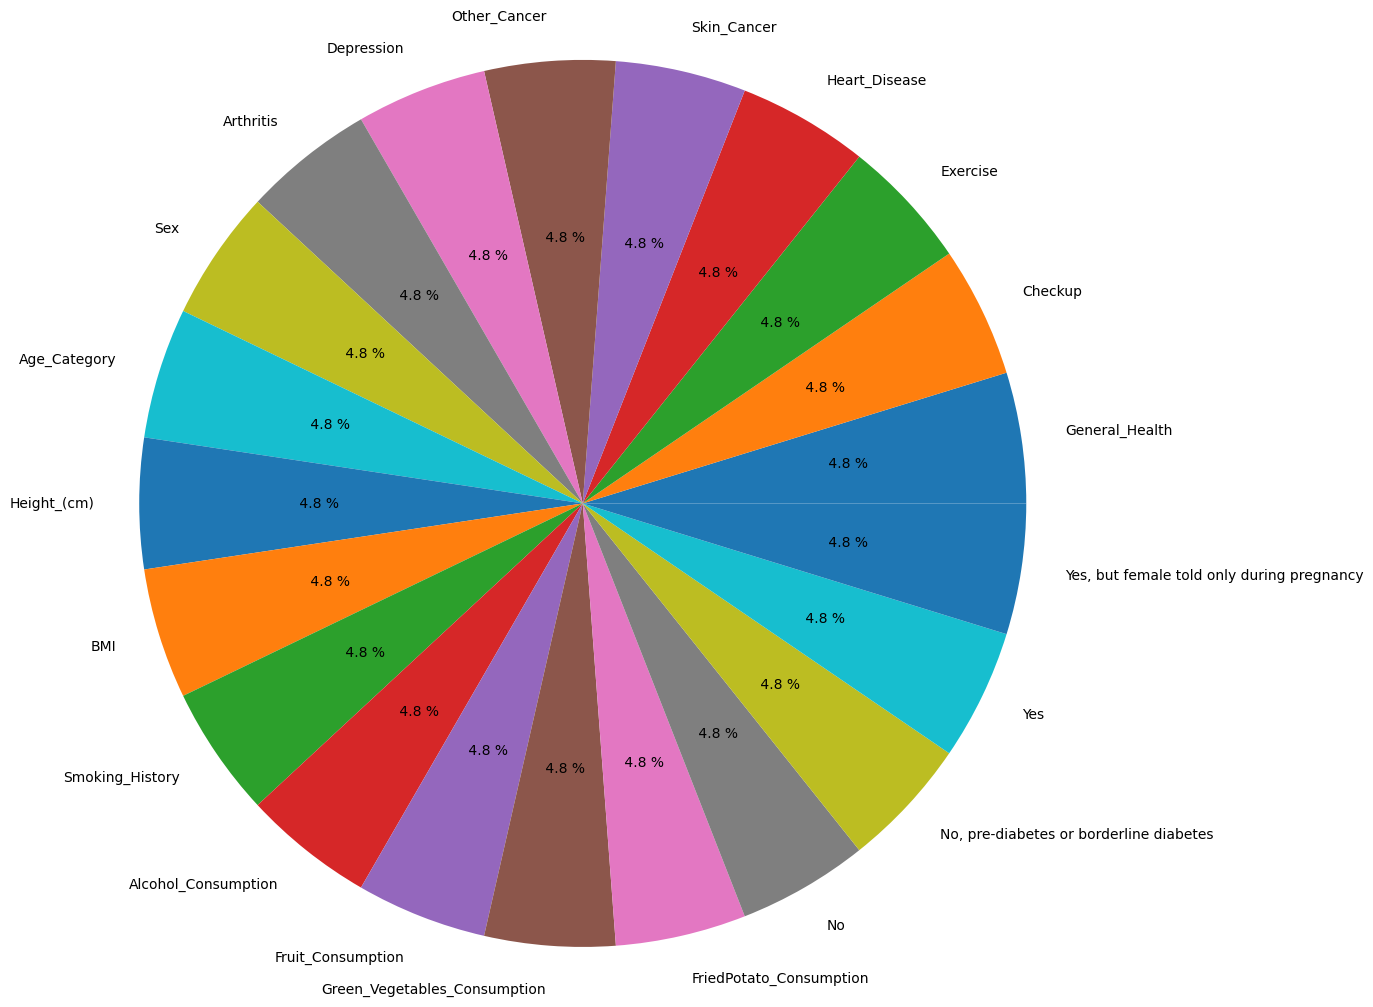

In [60]:
#A pie chart is made to visualy see that all variables have the same weight 

plt.pie (porcentaje_por_columna2,labels= porcentaje_por_columna2.index, autopct = "% 1.1f %%", radius= 3 )

In [61]:
df_clean19.shape

(308437, 21)

In [62]:
#Undersampling
X = df_clean19[['Checkup', 'Exercise', "Skin_Cancer", "Other_Cancer","Depression", "Arthritis", "Sex","Age_Category","Height_(cm)",
        "BMI", "Smoking_History", "Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption",
       "FriedPotato_Consumption", "No", "No, pre-diabetes or borderline diabetes", "Yes", "Yes, but female told only during pregnancy"]].values


y = df_clean19[['Heart_Disease']].values


undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)  #Resample for undersampling

In [63]:
print("Shape X:\n",X_resampled.shape, "\n")
print("Shape y:\n",y_resampled.shape, "\n")

Shape X:
 (49872, 19) 

Shape y:
 (49872,) 



In [64]:
#SMOTE
X = df_clean19[['Checkup', 'Exercise', "Skin_Cancer", "Other_Cancer","Depression", "Arthritis", "Sex","Age_Category","Height_(cm)",
        "BMI", "Smoking_History", "Alcohol_Consumption", "Fruit_Consumption", "Green_Vegetables_Consumption",
       "FriedPotato_Consumption", "No", "No, pre-diabetes or borderline diabetes", "Yes", "Yes, but female told only during pregnancy"]].values

#the response variable is defined 
y = df_clean19[['Heart_Disease']].values

#We use the SMOTE tecnique to balance the dataset 
smote = SMOTE(random_state=42)
X_resampled_S, y_resampled_S = smote.fit_resample(X, y) #Resampled S for smote 

In [65]:
print("Shape X:\n",X_resampled_S.shape, "\n")
print("Shape y:\n",y_resampled_S.shape, "\n")

Shape X:
 (567002, 19) 

Shape y:
 (567002,) 



## 3. Divide the dataset in a training, validation, and test set. Make sure that the distributions in the training, validation, and test set are similar (provide a graph with the number of observations on each class for the three sets). Justify the percentage of observations assigned to each dataset using literature (include references to a paper or books to justify the percentage selected, class slides or internet blogs are not a valid reference)

In [66]:
#Undersampling

#we divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

#We divide the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

#We print the size of each trined model 
print('Training X  : ', X_train.shape)
print('Validation X: ', X_val.shape)
print('Test X      :',X_test.shape)
print('Training Y  : ', y_train.shape)
print('Validation Y: ', y_val.shape)
print('Test Y      :',y_test.shape)

Training X  :  (31917, 19)
Validation X:  (7980, 19)
Test X      : (9975, 19)
Training Y  :  (31917,)
Validation Y:  (7980,)
Test Y      : (9975,)


In [67]:
#SMOTE

#We divide the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

#We divide the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

#We print the size of each dataset
print('Training X  : ', X_train.shape)
print('Validation X: ', X_val.shape)
print('Test X      :',X_test.shape)
print('Training Y  : ', y_train.shape)
print('Validation Y: ', y_val.shape)
print('Test Y      :',y_test.shape)

Training X  :  (31917, 19)
Validation X:  (7980, 19)
Test X      : (9975, 19)
Training Y  :  (31917,)
Validation Y:  (7980,)
Test Y      : (9975,)


## 4. Implement a machine learning algorithm and statistically prove which of the two techniques researched in point 2 improves the prediction. To statistically prove this point, you must define the null and alternative hypothesis (H0, Ha) , test statistic, calculate Pvalue, and draw a conclusion (revise your notes/lectures from Statics class, and select an appropriate test). In the presentation and report the statistical method applied needs to be clearly explained. 

In [68]:
# Define the classification model to be used (for example, Logistic Regression).
model = LogisticRegression()

# define the CV 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Train the classification model with cross-validation using the undersampled data.
scores_undersampled = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_micro')
mean_score_undersampled = scores_undersampled.mean()

# Train the classification model with cross-validation using the SMOTE-resampled data
scores_smote = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_micro')
mean_score_smote = scores_smote.mean()

#Hypothesis test 
t_stat, p_value = ttest_rel(scores_undersampled, scores_smote)

if p_value < 0.05:
    print('Hay una diferencia significativa entre los dos métodos.')
    if mean_score_undersampled > mean_score_smote:
        print('El método undersampling es mejor.')
    else:
        print('El método SMOTE es mejor.')
else:
    print('No hay una diferencia significativa entre los dos métodos.')

C:\Users\Personal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Personal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

No hay una diferencia significativa entre los dos métodos.


C:\Users\Personal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 5. Apply at least 4 machine learning algorithms using the best training strategy found in point 4. 
## 5.1 At least 1 algorithm must be an ensemble.
## 5.2 At least 1 algorithm must be a model not seen in class (you must research and understand how the model mathematically works and performs the prediction, include a good description about these points in the presentation and report).
## 5.3 For at least 2 algorithms apply a hyperparameter optimization method. Mention the range of values in which the hyperparameters are searched.
## 5.4 For all hyperparameters of the implemented models (and not optimized) justify the value assigned (read papers or books that provide a recommendation and include the references in the presentation and report). 

## 5.1 Random Forest

In [69]:
#We utilize Random Forest for the prediction using the base that gives the best result 

# There are extra libraries that have to be imported for the model to work
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# we set the variable RF 
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model on the training data and make the data fit 
rf.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred_rf = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"When performing Random Forest, there is an accuracy of: {accuracy*100}%")


# https://gist.github.com/pb111/88545fa33780928694388779af23bf58

When performing Random Forest, there is an accuracy of: 100.0%


In [70]:
#We utilize Random Forest for the prediction using the base that gives the worst results 

#Importing libraries 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Seting the variable for the algorth to work 
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"When performing Random Forest, there is an accuracy of: {accuracy*100}%")

# taken from: https://gist.github.com/pb111/88545fa33780928694388779af23bf58

When performing Random Forest, there is an accuracy of: 73.26315789473684%


In [71]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from dmba import classificationSummary

In [72]:
from sklearn.metrics import confusion_matrix

### Test set for random forest algorithm

In [73]:
y_pred_test = rf.predict(X_test)
print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.76      0.69      0.72      5071
           1       0.71      0.78      0.74      4904

    accuracy                           0.73      9975
   macro avg       0.73      0.73      0.73      9975
weighted avg       0.74      0.73      0.73      9975



### Confusion Matrix


In [74]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#!conda install -c conda-forge mord
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

In [75]:
# We calculate the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_rf)

# We show the confusion matrix.
print(f'              {"Prediction: 0":^15}  {"Prediction: 1":^15} ')
print(f'{"Real 0":^11}  {cm_test[0,0]:^15}   {cm_test[0,1]:^15} ')
print(f'{"Real 1":^11}   {cm_test[1,0]:^15}  {cm_test[1,1]:^15}')

               Prediction: 0    Prediction: 1  
  Real 0          3488              1583       
  Real 1           1084             3820      


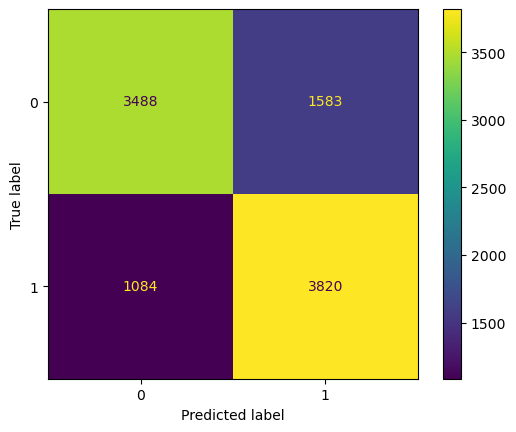

In [76]:
#Matriz de confusión
cm_test = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()

#### AUC, ROC CURVE Random forest for test set 

In [77]:
from sklearn.metrics import accuracy_score, roc_curve, auc

In [78]:
# We obtain the prediction probabilities for the train test set.
y_score = rf.predict_proba(X_test)[:,1]

# calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auctest = auc(fpr, tpr)

# show the AUC
print('AUC:', roc_auctest)

AUC: 0.7998905348295636


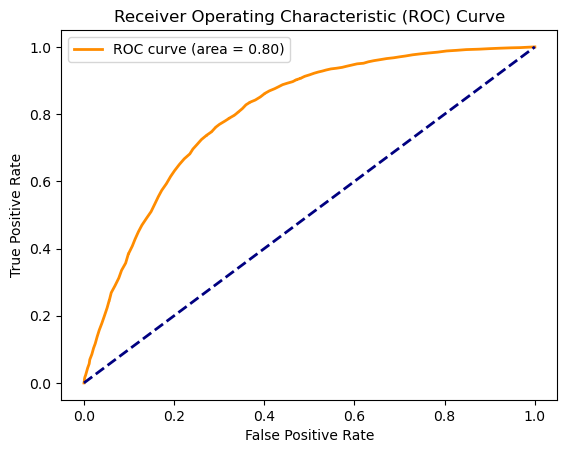

In [79]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auctest = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auctest:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

### Acc, Sen, Espe, Prec for test set 

In [80]:
# Calculate the values for the classifications from the confusion matrix
# True Positives
TP = cm_test[1, 1]
# False Negatives
FN = cm_test[1, 0]
# False Positives
FP = cm_test[0, 1]
# True Negatives
TN = cm_test[0, 0]

# Calculation of accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
# Calculation of precision
precision = TP / (TP + FP)
# Calculation of sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)
# Calculation of specificity (True Negative Rate)
specificity = TN / (TN + FP)

print("Accuracy is:", accuracy)
print("Precision is:", precision)
print("Sensitivity is:", sensitivity)
print("Specificity is:", specificity)


Accuracy is: 0.7326315789473684
Precision is: 0.7070146215065705
Sensitivity is: 0.7789559543230016
Specificity is: 0.6878327746006705


### validation set for random forest algorith 

In [81]:
#we start by printing the classification report for the validation set for the algorith random forest 
y_pred_val = rf.predict(X_val)
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      4024
           1       0.71      0.77      0.74      3956

    accuracy                           0.73      7980
   macro avg       0.73      0.73      0.73      7980
weighted avg       0.73      0.73      0.73      7980



#### Confusion Matrix random forest validation set 

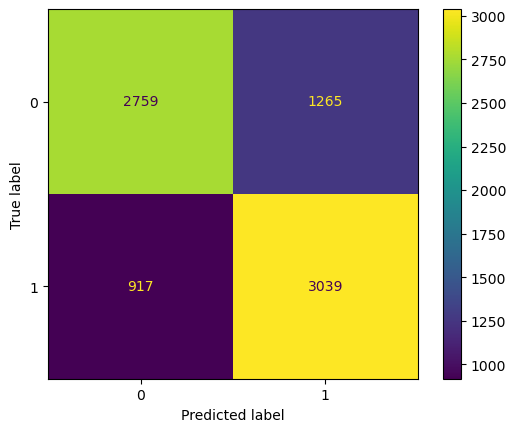

In [82]:
cm_val = confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()
plt.show()

#### AUC, ROC CURVE Random forest for validation set 

In [83]:
# We obtain the prediction probabilities for the val set.
y_score = rf.predict_proba(X_val)[:,1]

# calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_score)
roc_aucval = auc(fpr, tpr)

# show the AUC
print('AUC:', roc_aucval)

AUC: 0.7954607416170318


In [84]:
classifier = LogisticRegression()
classifier.fit(X_val, y_val)
y_scores = classifier.predict_proba(X_val)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_val, y_scores)
roc_aucval = auc(fpr, tpr)

C:\Users\Personal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


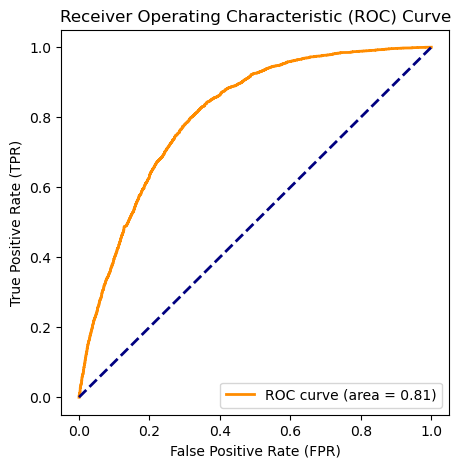

In [85]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_aucval))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Acc, Sen, Espe, Prec for validation set 

In [86]:
# Calculate the values for the classifications from the confusion matrix
# True Positives
TP = cm_val[1, 1]
# False Negatives
FN = cm_val[1, 0]
# False Positives
FP = cm_val[0, 1]
# True Negatives
TN = cm_val[0, 0]

# Calculation of accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
# Calculation of precision
precision = TP / (TP + FP)
# Calculation of sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)
# Calculation of specificity (True Negative Rate)
specificity = TN / (TN + FP)

print("Accuracy is:", accuracy)
print("Precision is:", precision)
print("Sensitivity is:", sensitivity)
print("Specificity is:", specificity)


Accuracy is: 0.7265664160401003
Precision is: 0.7060873605947955
Sensitivity is: 0.7682002022244692
Specificity is: 0.6856361829025845


### Train set for random forest algorith

In [87]:
#we start by printing the classification report for the train set for the algorith random forest 
y_pred_train = rf.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15841
           1       1.00      1.00      1.00     16076

    accuracy                           1.00     31917
   macro avg       1.00      1.00      1.00     31917
weighted avg       1.00      1.00      1.00     31917



In [88]:
from sklearn.metrics import accuracy_score, roc_curve, auc

#### Confusion Matrix random forest train set 

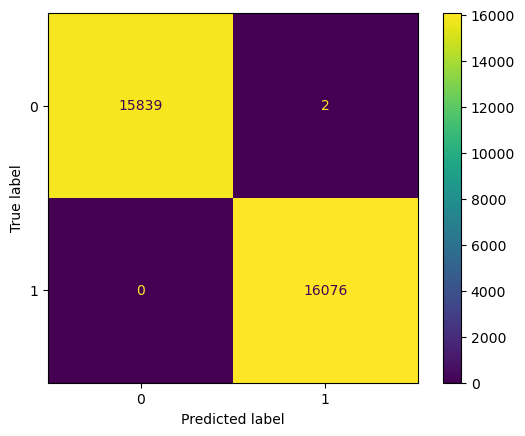

In [89]:
cm_train = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot()
plt.show()

#### AUC, ROC CURVE Random forest for the train set 

In [90]:
# We obtain the prediction probabilities for the train test set.
y_score = rf.predict_proba(X_train)[:,1]

# calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_train, y_score)
roc_auctrain = auc(fpr, tpr)

# show the AUC
print('AUC:', roc_auctrain)

AUC: 0.9999999018298584


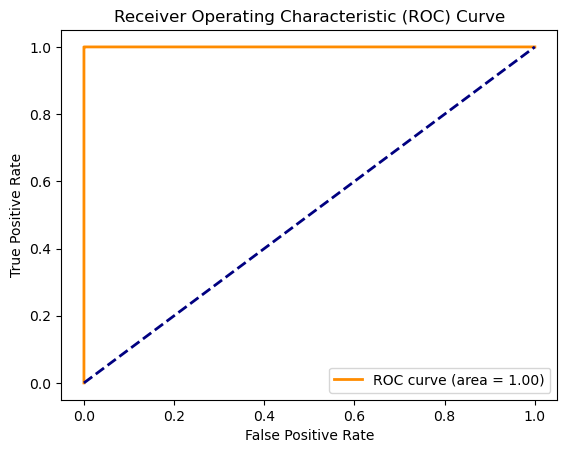

In [91]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, rf.predict_proba(X_train)[:,1])
roc_auctrain = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auctrain:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

### Acc, Sen, Espe, Prec for train set 

In [92]:
# Calculate the values for the classifications from the confusion matrix
# True Positives
TP = cm_train[1, 1]
# False Negatives
FN = cm_train[1, 0]
# False Positives
FP = cm_train[0, 1]
# True Negatives
TN = cm_train[0, 0]

# Calculation of accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
# Calculation of precision
precision = TP / (TP + FP)
# Calculation of sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)
# Calculation of specificity (True Negative Rate)
specificity = TN / (TN + FP)

print("Accuracy is:", accuracy)
print("Precision is:", precision)
print("Sensitivity is:", sensitivity)
print("Specificity is:", specificity)

Accuracy is: 0.9999373374690603
Precision is: 0.9998756064187088
Sensitivity is: 1.0
Specificity is: 0.9998737453443596


## 5.2 Neural Network

A neural network in Python is a computational model inspired by the human brain's structure, used for tasks like pattern recognition and data analysis.

In [93]:
#pip install tensorflow # In order for the algorith to work we have to instal tensorflow


In [94]:
# In a production setting, you would use a deep learning framework like TensorFlow or PyTorch instead of building your own neural network

import tensorflow as tf #importing tensor flow 

print(tf.__version__) #this shows the version installed


2.15.0


In [95]:
from tensorflow import keras

In [96]:
#First we generate the neural network model 

model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4))#input
model.add(tf.keras.layers.Dense(16, activation='relu'))#hidden
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
#output, softmax makes the sum of the probability of both cathegories equals to 1

#this code is to optimize parameters
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC()])

#the model is inspected and it stops when there is no bettering
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=6,restore_best_weights=True)

In [97]:
#fitting the train model
model.fit(X_train,y_train,epochs=32,batch_size=32,callbacks=[early_stopping],validation_data=(X_val,y_val))

Epoch 1/32


998/998 [==============================] - 14s 8ms/step - loss: 1.3863 - accuracy: 0.6736 - auc: 0.7103 - val_loss: 0.6088 - val_accuracy: 0.6529 - val_auc: 0.7833
Epoch 2/32
998/998 [==============================] - 6s 6ms/step - loss: 0.5530 - accuracy: 0.7206 - auc: 0.7875 - val_loss: 0.5414 - val_accuracy: 0.7335 - val_auc: 0.7992
Epoch 3/32
998/998 [==============================] - 7s 7ms/step - loss: 0.5422 - accuracy: 0.7289 - auc: 0.7980 - val_loss: 0.5383 - val_accuracy: 0.7360 - val_auc: 0.8042
Epoch 4/32
998/998 [==============================] - 6s 6ms/step - loss: 0.5406 - accuracy: 0.7287 - auc: 0.8003 - val_loss: 0.5355 - val_accuracy: 0.7348 - val_auc: 0.8044
Epoch 5/32
998/998 [==============================] - 6s 6ms/step - loss: 0.5393 - accuracy: 0.7301 - auc: 0.8012 - val_loss: 0.5543 - val_accuracy: 0.7105 - val_auc: 0.8051
Epoch 6/32
998/998 [==============================] - 7s 7ms/step - loss: 0.5390 - accuracy: 0.7304 - auc: 0.8016 - val_loss: 0

In [98]:
#The model is evaluated
model.evaluate(X_test,y_test)

312/312 [==============================] - 1s 5ms/step - loss: 0.5352 - accuracy: 0.7342 - auc: 0.8079


[0.5351879000663757, 0.7342355847358704, 0.8079230785369873]

In [99]:
# Model with an accuracy of 73%

### Test set for neural network algorithm

#### Confusion Matrix for neural network test set 

In [100]:
# Obtain predictions from the model on the test set
y_pred3 = tf.keras.backend.round(model.predict(X_test))  # Round because the sigmoid activation returns values between 0 and 1

# Calculate the confusion matrix
cmTestNN = confusion_matrix(y_test, y_pred3)

# Display the confusion matrix
print(f'              {"Prediction: 0":^15}  {"Prediction: 1":^15} ')
print(f'{"Actual 0":^11}  {cmTestNN[0,0]:^15}   {cmTestNN[0,1]:^15} ')
print(f'{"Actual 1":^11}   {cmTestNN[1,0]:^15}  {cmTestNN[1,1]:^15} \n')


312/312 [==============================] - 1s 4ms/step
               Prediction: 0    Prediction: 1  
 Actual 0         3294              1777       
 Actual 1           874             4030       



In [101]:
# We obtain the prediction probabilities for the test set.
y_score = model.predict(X_test)

# calculate the ROC curve and AUC
fprtestNN, tprtestNN, _ = roc_curve(y_test, y_score)
roc_auctestNN = auc(fprtestNN, tprtestNN)

# show the AUC
print('AUC:', roc_auctestNN)

312/312 [==============================] - 1s 4ms/step
AUC: 0.8079234897087783


312/312 [==============================] - 1s 4ms/step


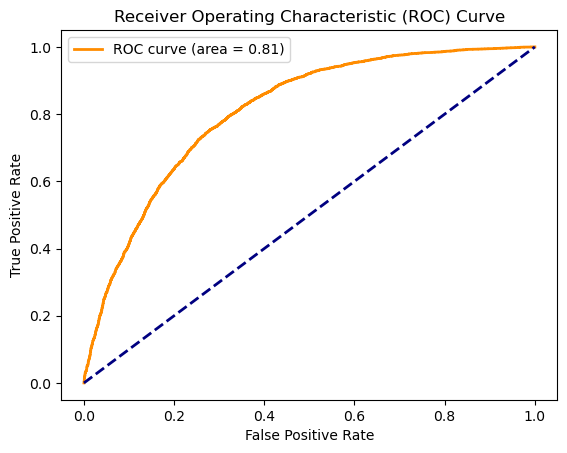

In [102]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auctestNN = auc(fpr, tpr)

plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auctestNN:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

In [103]:
# Calculate the values for the classifications from the confusion matrix
# True Positives
TP = cmTestNN[1, 1]
# False Negatives
FN = cmTestNN[1, 0]
# False Positives
FP = cmTestNN[0, 1]
# True Negatives
TN = cmTestNN[0, 0]

# Calculation of accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
# Calculation of precision
precision = TP / (TP + FP)
# Calculation of sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)
# Calculation of specificity (True Negative Rate)
specificity = TN / (TN + FP)

print("Accuracy is:", accuracy)
print("Precision is:", precision)
print("Sensitivity is:", sensitivity)
print("Specificity is:", specificity)

Accuracy is: 0.7342355889724311
Precision is: 0.6939900120544171
Sensitivity is: 0.8217781402936378
Specificity is: 0.6495760205087754


### Validation set for neural network algorithm

#### Confusion matrix for Neural Network algorth for the validation set 

In [104]:
# Obtain predictions from the model on the validation set
y_pred3 = tf.keras.backend.round(model.predict(X_val))  # Round because the sigmoid activation returns values between 0 and 1

# Calculate the confusion matrix
cmvalNN = confusion_matrix(y_val, y_pred3)

# Display the confusion matrix
print(f'              {"Prediction: 0":^15}  {"Prediction: 1":^15} ')
print(f'{"Actual 0":^11}  {cmvalNN[0,0]:^15}   {cmvalNN[0,1]:^15} ')
print(f'{"Actual 1":^11}   {cmvalNN[1,0]:^15}  {cmvalNN[1,1]:^15} \n')


250/250 [==============================] - 1s 4ms/step
               Prediction: 0    Prediction: 1  
 Actual 0         2613              1411       
 Actual 1           696             3260       



#### AUC, ROC CURVE Random forest for the validation set 

In [105]:
# We obtain the prediction probabilities for the validation set.
y_score = model.predict(X_val)

# calculate the ROC curve and AUC
fprvalNN, tprvalNN, _ = roc_curve(y_val, y_score)
roc_aucvalNN = auc(fprvalNN, tprvalNN)

# show the AUC
print('AUC:', roc_aucvalNN)

250/250 [==============================] - 1s 4ms/step
AUC: 0.8041333960343099


250/250 [==============================] - 1s 4ms/step


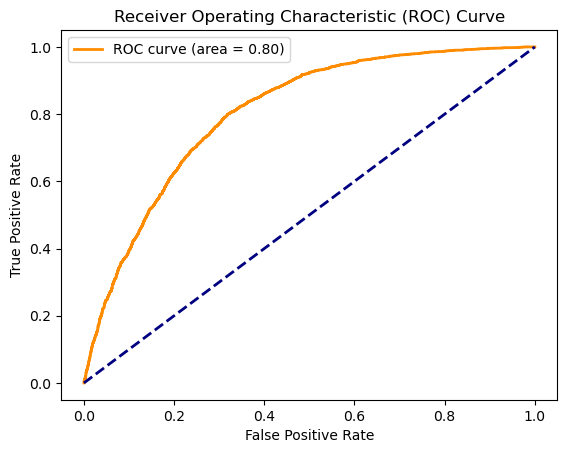

In [106]:
fprvalNN, tprvalNN, thresholds = roc_curve(y_val, model.predict(X_val))
roc_aucvalNN = auc(fprvalNN, tprvalNN)

plt.plot(fprvalNN, tprvalNN, color="darkorange", lw=2, label=f"ROC curve (area = {roc_aucvalNN:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

In [107]:
# Calculate the values for the classifications from the confusion matrix
# True Positives
TP = cmvalNN[1, 1]
# False Negatives
FN = cmvalNN[1, 0]
# False Positives
FP = cmvalNN[0, 1]
# True Negatives
TN = cmvalNN[0, 0]

# Calculation of accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
# Calculation of precision
precision = TP / (TP + FP)
# Calculation of sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)
# Calculation of specificity (True Negative Rate)
specificity = TN / (TN + FP)

print("Accuracy is:", accuracy)
print("Precision is:", precision)
print("Sensitivity is:", sensitivity)
print("Specificity is:", specificity)

Accuracy is: 0.7359649122807017
Precision is: 0.6979233568828944
Sensitivity is: 0.8240647118301314
Specificity is: 0.6493538767395626


### Train set for neural network algorithm

#### Confusion matrix for Neural Network algorth for the train set 

In [108]:
# Obtain predictions from the model on the validation set
y_pred3 = tf.keras.backend.round(model.predict(X_train))  # Round because the sigmoid activation returns values between 0 and 1

# Calculate the confusion matrix
cmtrainNN = confusion_matrix(y_train, y_pred3)

# Display the confusion matrix
print(f'              {"Prediction: 0":^15}  {"Prediction: 1":^15} ')
print(f'{"Actual 0":^11}  {cmtrainNN[0,0]:^15}   {cmtrainNN[0,1]:^15} ')
print(f'{"Actual 1":^11}   {cmtrainNN[1,0]:^15}  {cmtrainNN[1,1]:^15} \n')

998/998 [==============================] - 4s 4ms/step
               Prediction: 0    Prediction: 1  
 Actual 0         10269             5572       
 Actual 1          2778             13298      



#### AUC, ROC CURVE Random forest for the train set 

In [109]:
# We obtain the prediction probabilities for the train set.
y_score = model.predict(X_train)

# calculate the ROC curve and AUC
fprtrainNN, tprtrainNN, _ = roc_curve(y_train, y_score)
roc_auctrainNN = auc(fprtrainNN, tprtrainNN)

# show the AUC
print('AUC:', roc_auctrainNN)

998/998 [==============================] - 4s 4ms/step
AUC: 0.8101005244186132


998/998 [==============================] - 4s 4ms/step


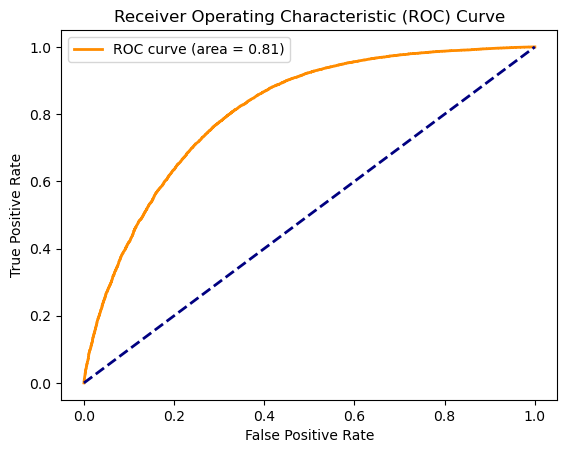

In [110]:
fprtrainNN, tprtrainNN, thresholds = roc_curve(y_train, model.predict(X_train))
roc_auctrainNN = auc(fprtrainNN, tprtrainNN)

plt.plot(fprtrainNN, tprtrainNN, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auctrainNN:0.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

### Acc, Sen, Espe, Prec For neural network algorith for train set 

In [111]:
# Calculate the values for the classifications from the confusion matrix
# True Positives
TP = cmtrainNN[1, 1]
# False Negatives
FN = cmtrainNN[1, 0]
# False Positives
FP = cmtrainNN[0, 1]
# True Negatives
TN = cmtrainNN[0, 0]

# Calculation of accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
# Calculation of precision
precision = TP / (TP + FP)
# Calculation of sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)
# Calculation of specificity (True Negative Rate)
specificity = TN / (TN + FP)

print("Accuracy is:", accuracy)
print("Precision is:", precision)
print("Sensitivity is:", sensitivity)
print("Specificity is:", specificity)

Accuracy is: 0.7383839333270671
Precision is: 0.7047164811870694
Sensitivity is: 0.8271958198556855
Specificity is: 0.6482545293857711


### AUC

In [112]:
loss, accuracy, auc3=model.evaluate(X_test, y_test)

312/312 [==============================] - 1s 4ms/step - loss: 0.5352 - accuracy: 0.7342 - auc: 0.8079


### ROC curve

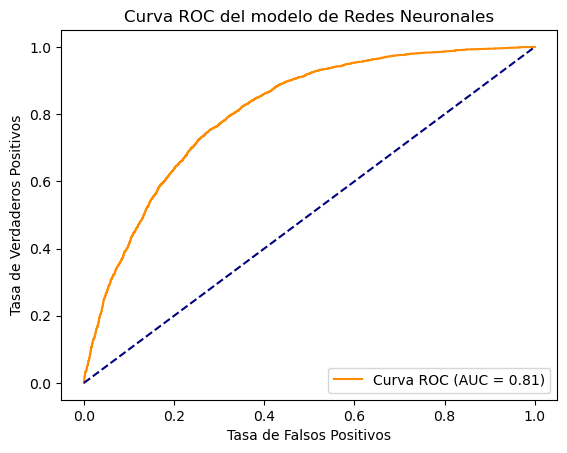

In [113]:
# Graficamos la curva ROC
plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (AUC = %0.2f)' % auc3)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del modelo de Redes Neuronales')
plt.legend(loc="lower right")
plt.show()

## 5.3

## KNN

In [114]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [115]:
# Create a KNN (K-Nearest Neighbors) object with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model with the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy*100}%")


Model accuracy: 64.49122807017544%


### Hyperparameter

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
# Define a grid of values for hyperparameters
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Create a Grid Search object
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Train the model with the training and validation data
grid_search.fit(X_train, y_train)

# Obtain the best hyperparameters and cross-validation score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a model with the best hyperparameters using the training and validation data
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
knn.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print('Best Hyperparameters:', best_params)
print('Cross-validation score:', best_score)
print('Accuracy of the test data:', accuracy)


Best Hyperparameters: {'n_neighbors': 9, 'weights': 'distance'}
Cross-validation score: 0.6588025710131509
Accuracy of the test data: 0.6534335839598997


### Test set for the KNN algorith 

In [118]:
# We start by printing the classification report for the Knn test set 

y_pred_testKNN = knn.predict(X_test)
print(classification_report(y_test, y_pred_testKNN))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64      5071
           1       0.64      0.69      0.66      4904

    accuracy                           0.65      9975
   macro avg       0.65      0.65      0.65      9975
weighted avg       0.66      0.65      0.65      9975



#### Confusion Matrix for the KNN algorith for the test test

In [119]:
# calculating the confusion matrix 
cmtestKNN= confusion_matrix(y_test, y_pred_testKNN)

# print the confusion matrix 
print(f'              {"Prediction: 0":^15}  {"Prediction: 1":^15} ')
print(f'{"Real 0":^11}  {cmtestKNN[0,0]:^15}   {cmtestKNN[0,1]:^15} ')
print(f'{"Real 1":^11}   {cmtestKNN[1,0]:^15}  {cmtestKNN[1,1]:^15}')

               Prediction: 0    Prediction: 1  
  Real 0          3120              1951       
  Real 1           1506             3398      


#### AUC, ROC CURVE KNN for the test set 

In [120]:
# Obtain prediction probabilities for the test data
y_scoretestKNN = knn.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fprtestKNN, tprtestKNN, _ = roc_curve(y_test,y_scoretestKNN)
roc_auctestKNN = auc(fprtestKNN, tprtestKNN)

# Display the AUC
print('AUC:', roc_auctestKNN)


AUC: 0.7113658560673348


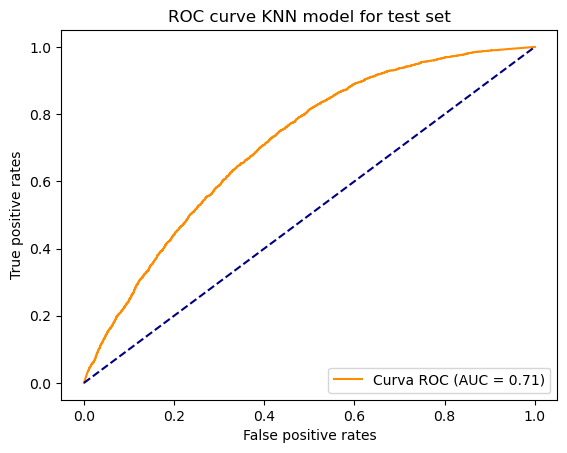

In [121]:
# Plotting the roc curve 
plt.plot(fprtestKNN, tprtestKNN, color='darkorange', label='Curva ROC (AUC = %0.2f)' %roc_auctestKNN)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.title('ROC curve KNN model for test set')
plt.legend(loc="lower right")
plt.show()

#### Acc, Sen, Espe, Prec for the KNN algorith for the test set

In [122]:
# Calculate the values for the classifications from the confusion matrix
# True Positives
TP = cmtestKNN[1, 1]
# False Negatives
FN = cmtestKNN[1, 0]
# False Positives
FP = cmtestKNN[0, 1]
# True Negatives
TN = cmtestKNN[0, 0]

# Calculation of accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
# Calculation of precision
precision = TP / (TP + FP)
# Calculation of sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)
# Calculation of specificity (True Negative Rate)
specificity = TN / (TN + FP)

print("Accuracy is:", accuracy)
print("Precision is:", precision)
print("Sensitivity is:", sensitivity)
print("Specificity is:", specificity)

Accuracy is: 0.6534335839598997
Precision is: 0.6352589269022247
Sensitivity is: 0.6929037520391517
Specificity is: 0.615263261684086


### validation set for the KNN algorith 

In [123]:
# We start by printing the classification report for the Knn test set 

y_pred_valKNN = knn.predict(X_val)
print(classification_report(y_val, y_pred_valKNN))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64      4024
           1       0.64      0.70      0.67      3956

    accuracy                           0.66      7980
   macro avg       0.66      0.66      0.66      7980
weighted avg       0.66      0.66      0.66      7980



In [124]:
# calculating the confusion matrix 
cmvalKNN= confusion_matrix(y_val, y_pred_valKNN)

# print the confusion matrix 
print(f'              {"Prediction: 0":^15}  {"Prediction: 1":^15} ')
print(f'{"Real 0":^11}  {cmvalKNN[0,0]:^15}   {cmvalKNN[0,1]:^15} ')
print(f'{"Real 1":^11}   {cmvalKNN[1,0]:^15}  {cmvalKNN[1,1]:^15}')

               Prediction: 0    Prediction: 1  
  Real 0          2454              1570       
  Real 1           1173             2783      


#### AUC, ROC CURVE KNN for the validation set 

In [125]:
# Obtain prediction probabilities for the test data
y_scorevalKNN = knn.predict_proba(X_val)[:, 1]

# Calculate the ROC curve and AUC
fprvalKNN, tprvalKNN, _ = roc_curve(y_val,y_scorevalKNN)
roc_aucvalKNN = auc(fprvalKNN, tprvalKNN)

# Display the AUC
print('AUC:', roc_aucvalKNN)

AUC: 0.7075043105874359


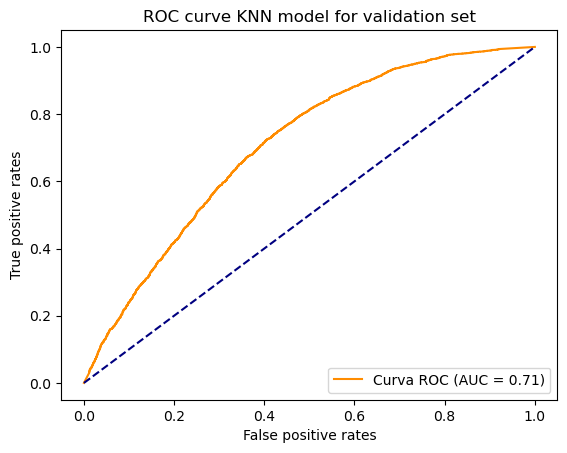

In [126]:
# Plotting the roc curve 
plt.plot(fprvalKNN, tprvalKNN, color='darkorange', label='Curva ROC (AUC = %0.2f)' %roc_aucvalKNN)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.title('ROC curve KNN model for validation set')
plt.legend(loc="lower right")
plt.show()

#### Acc, Sen, Espe, Prec for the KNN algorith for the val set

In [127]:
# Calculate the values for the classifications from the confusion matrix
# True Positives
TP = cmvalKNN[1, 1]
# False Negatives
FN = cmvalKNN[1, 0]
# False Positives
FP = cmvalKNN[0, 1]
# True Negatives
TN = cmvalKNN[0, 0]

# Calculation of accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
# Calculation of precision
precision = TP / (TP + FP)
# Calculation of sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)
# Calculation of specificity (True Negative Rate)
specificity = TN / (TN + FP)

print("Accuracy is:", accuracy)
print("Precision is:", precision)
print("Sensitivity is:", sensitivity)
print("Specificity is:", specificity)

Accuracy is: 0.656265664160401
Precision is: 0.6393291982540776
Sensitivity is: 0.7034883720930233
Specificity is: 0.6098409542743539


### Train set for the KNN algorith 

In [128]:
# We start by printing the classification report for the Knn train set 

y_pred_trainKNN = knn.predict(X_train)
print(classification_report(y_train, y_pred_trainKNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15841
           1       1.00      1.00      1.00     16076

    accuracy                           1.00     31917
   macro avg       1.00      1.00      1.00     31917
weighted avg       1.00      1.00      1.00     31917



In [129]:
# calculating the confusion matrix 
cmtrainKNN= confusion_matrix(y_train, y_pred_trainKNN)

# print the confusion matrix 
print(f'              {"Prediction: 0":^15}  {"Prediction: 1":^15} ')
print(f'{"Real 0":^11}  {cmtrainKNN[0,0]:^15}   {cmtrainKNN[0,1]:^15} ')
print(f'{"Real 1":^11}   {cmtrainKNN[1,0]:^15}  {cmtrainKNN[1,1]:^15}')

               Prediction: 0    Prediction: 1  
  Real 0          15841               0        
  Real 1             2              16074     


#### AUC, ROC CURVE KNN for the validation set 

In [130]:
# Obtain prediction probabilities for the test data
y_scoretrainKNN = knn.predict_proba(X_train)[:, 1]

# Calculate the ROC curve and AUC
fprtrainKNN, tprtrainKNN, _ = roc_curve(y_train,y_scoretrainKNN)
roc_auctrainKNN = auc(fprtrainKNN, tprtrainKNN)

# Display the AUC
print('AUC:', y_scoretrainKNN )

AUC: [1. 0. 0. ... 1. 1. 1.]


In [131]:
from sklearn.metrics import accuracy_score #the value looks rare so we tried a different technique 

In [132]:
y_pred_trainknn = knn.predict(X_train)

In [133]:
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f'Accuracy on training data: {accuracy_train}')

Accuracy on training data: 0.9999373374690603


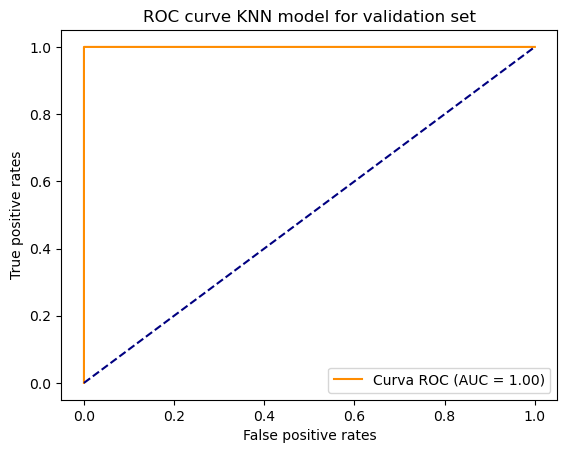

In [134]:
# Plotting the roc curve 
plt.plot(fprtrainKNN, tprtrainKNN, color='darkorange', label='Curva ROC (AUC = %0.2f)' %roc_auctrainKNN)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.title('ROC curve KNN model for validation set')
plt.legend(loc="lower right")
plt.show()

#### Acc, Sen, Espe, Prec for the KNN algorith for the train set

In [160]:
# Calculate the values for the classifications from the confusion matrix
# True Positives
TP = cmtrainKNN[1, 1]
# False Negatives
FN = cmtrainKNN[1, 0]
# False Positives
FP = cmtrainKNN[0, 1]
# True Negatives
TN = cmtrainKNN[0, 0]

# Calculation of accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
# Calculation of precision
precision = TP / (TP + FP)
# Calculation of sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)
# Calculation of specificity (True Negative Rate)
specificity = TN / (TN + FP)

print("Accuracy is:", accuracy)
print("Precision is:", precision)
print("Sensitivity is:", sensitivity)
print("Specificity is:", specificity)

Accuracy is: 0.9999373374690603
Precision is: 1.0
Sensitivity is: 0.9998755909430207
Specificity is: 1.0


## Decision Tree

In [135]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np

# Import functions to create decision trees
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# Import functions to create tree ensembles
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from sklearn import tree
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [136]:
# se utilizará Decision Tree para la predicción usando la base que da el mejor resultado

# se importan las librerias necesarias
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)

# Train the model on the training data
dt.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred_s = dt.predict(X_test)

# Print the accuracy of the model
print('The precision of the decision tree is :', dt.score(X_test, y_test))

# Código base tomado de: https://github.com/topics/decision-tree

Al realizar Decision Tree se tiene una precisión de: 0.7024561403508772


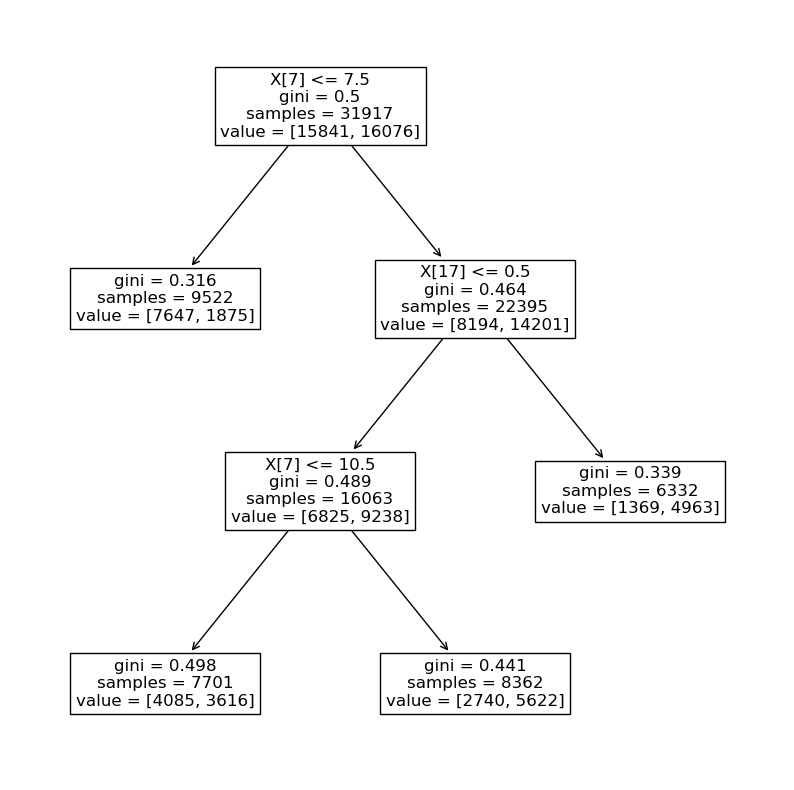

In [156]:

# We create a Tree with a defined stop criteria
smallClassTree = DecisionTreeClassifier(max_depth=30, 
                    min_samples_split=20, min_impurity_decrease=0.01) 
smallClassTree.fit(X_train, y_train)

plt.figure(figsize=(10,10)) 
tree.plot_tree(smallClassTree, fontsize=12)
plt.show()

### Hyperparameter

In [158]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Create an instance of the decision tree classifier
dt = DecisionTreeClassifier()

# Create an instance of the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)

# Fit the model using GridSearchCV
grid_search.fit(X_resampled, y_resampled)

# Get the best hyperparameters found
best_params = grid_search.best_params_

# Create a new instance of the decision tree classifier with the best hyperparameters
dt_best = DecisionTreeClassifier(**best_params)

# Train the model with the best hyperparameters
dt_best.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred_s = dt_best.predict(X_test)

# Print the accuracy of the model with the best hyperparameters
print('When performing Decision Tree with the best hyperparameters, the accuracy is:', dt_best.score(X_test, y_test))


When performing Decision Tree with the best hyperparameters, the accuracy is: 0.7390476190476191


### Test set for the Decision Tree algorith 

In [139]:
# We start by printing the classification report for the Decision test set 

y_pred_testDT = dt.predict(X_test)
print(classification_report(y_test, y_pred_testDT))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      5071
           1       0.71      0.67      0.69      4904

    accuracy                           0.70      9975
   macro avg       0.70      0.70      0.70      9975
weighted avg       0.70      0.70      0.70      9975



In [140]:
# calculating the confusion matrix 
cmtestDT= confusion_matrix(y_test, y_pred_testDT)

# print the confusion matrix 
print(f'              {"Prediction: 0":^15}  {"Prediction: 1":^15} ')
print(f'{"Real 0":^11}  {cmtestDT[0,0]:^15}   {cmtestDT[0,1]:^15} ')
print(f'{"Real 1":^11}   {cmtestDT[1,0]:^15}  {cmtestDT[1,1]:^15}')

               Prediction: 0    Prediction: 1  
  Real 0          3713              1358       
  Real 1           1610             3294      


#### AUC, ROC CURVE DT for the test set 

In [141]:
# Obtain prediction probabilities for the test data
y_scoretestDT = dt.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC
fprtestDT, tprtestDT, _ = roc_curve(y_test,y_scoretestDT)
roc_auctestDT = auc(fprtestDT, tprtestDT)

# Display the AUC
print('AUC:', y_scoretestDT )

AUC: [0.82249626 0.11519828 0.44010088 ... 0.72492056 0.72492056 0.46635134]


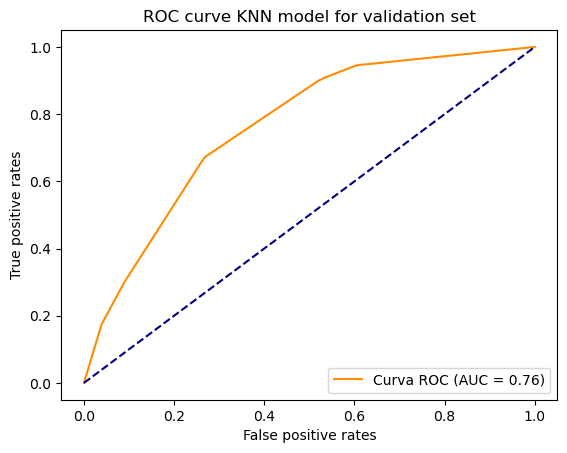

In [142]:
# Plotting the roc curve 
plt.plot(fprtestDT, tprtestDT, color='darkorange', label='Curva ROC (AUC = %0.2f)' %roc_auctestDT)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.title('ROC curve KNN model for validation set')
plt.legend(loc="lower right")
plt.show()

#### Acc, Sen, Espe, Prec for the DT algorith for the test set

In [143]:
# Calculate the values for the classifications from the confusion matrix
# True Positives
TP = cmtestDT[1, 1]
# False Negatives
FN = cmtestDT[1, 0]
# False Positives
FP = cmtestDT[0, 1]
# True Negatives
TN = cmtestDT[0, 0]

# Calculation of accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
# Calculation of precision
precision = TP / (TP + FP)
# Calculation of sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)
# Calculation of specificity (True Negative Rate)
specificity = TN / (TN + FP)

print("Accuracy is:", accuracy)
print("Precision is:", precision)
print("Sensitivity is:", sensitivity)
print("Specificity is:", specificity)

Accuracy is: 0.7024561403508772
Precision is: 0.7080825451418744
Sensitivity is: 0.6716965742251223
Specificity is: 0.7322027213567344


### validation set for the DT algorith 

In [144]:
# We start by printing the classification report for the Decision validation set 

y_pred_valDT = dt.predict(X_val)
print(classification_report(y_val, y_pred_valDT))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      4024
           1       0.71      0.67      0.69      3956

    accuracy                           0.70      7980
   macro avg       0.70      0.70      0.70      7980
weighted avg       0.70      0.70      0.70      7980



In [145]:
# calculating the confusion matrix 
cmvalDT= confusion_matrix(y_val, y_pred_valDT)

# print the confusion matrix 
print(f'              {"Prediction: 0":^15}  {"Prediction: 1":^15} ')
print(f'{"Real 0":^11}  {cmvalDT[0,0]:^15}   {cmvalDT[0,1]:^15} ')
print(f'{"Real 1":^11}   {cmvalDT[1,0]:^15}  {cmvalDT[1,1]:^15}')

               Prediction: 0    Prediction: 1  
  Real 0          2941              1083       
  Real 1           1301             2655      


#### AUC, ROC CURVE DT for the val set 

In [146]:
# Obtain prediction probabilities for the test data
y_scorevalDT = dt.predict_proba(X_val)[:, 1]

# Calculate the ROC curve and AUC
fprvalDT, tprvalDT, _ = roc_curve(y_val,y_scorevalDT)
roc_aucvalDT = auc(fprvalDT, tprvalDT)

# Display the AUC
print('AUC:', y_scorevalDT )

AUC: [0.36442516 0.82249626 0.11519828 ... 0.82249626 0.36442516 0.6710375 ]


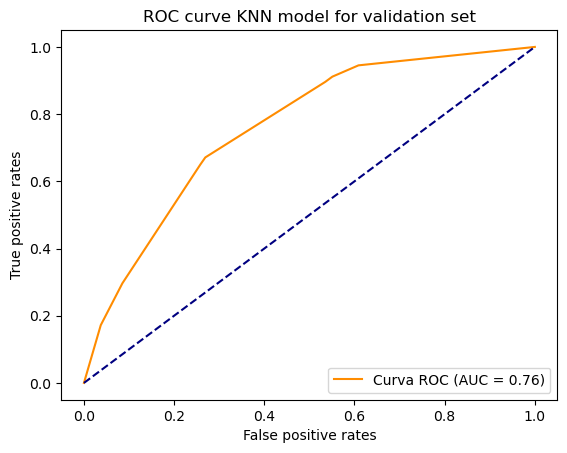

In [147]:
# Plotting the roc curve 
plt.plot(fprvalDT, tprvalDT, color='darkorange', label='Curva ROC (AUC = %0.2f)' %roc_aucvalDT)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.title('ROC curve KNN model for validation set')
plt.legend(loc="lower right")
plt.show()

#### Acc, Sen, Espe, Prec for the DT algorith for the val set

In [148]:
# Calculate the values for the classifications from the confusion matrix
# True Positives
TP = cmvalDT[1, 1]
# False Negatives
FN = cmvalDT[1, 0]
# False Positives
FP = cmvalDT[0, 1]
# True Negatives
TN = cmvalDT[0, 0]

# Calculation of accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
# Calculation of precision
precision = TP / (TP + FP)
# Calculation of sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)
# Calculation of specificity (True Negative Rate)
specificity = TN / (TN + FP)

print("Accuracy is:", accuracy)
print("Precision is:", precision)
print("Sensitivity is:", sensitivity)
print("Specificity is:", specificity)

Accuracy is: 0.7012531328320802
Precision is: 0.7102728731942215
Sensitivity is: 0.6711324570273003
Specificity is: 0.7308648111332008


### Train set for the DT algorith 

In [149]:
# We start by printing the classification report for the Decision validation set 

y_pred_trainDT = dt.predict(X_train)
print(classification_report(y_train, y_pred_trainDT))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     15841
           1       0.72      0.68      0.70     16076

    accuracy                           0.70     31917
   macro avg       0.70      0.70      0.70     31917
weighted avg       0.70      0.70      0.70     31917



In [150]:
# calculating the confusion matrix 
cmtrainDT= confusion_matrix(y_train, y_pred_trainDT)

# print the confusion matrix 
print(f'              {"Prediction: 0":^15}  {"Prediction: 1":^15} ')
print(f'{"Real 0":^11}  {cmtrainDT[0,0]:^15}   {cmtrainDT[0,1]:^15} ')
print(f'{"Real 1":^11}   {cmtrainDT[1,0]:^15}  {cmtrainDT[1,1]:^15}')

               Prediction: 0    Prediction: 1  
  Real 0          11548             4293       
  Real 1           5182             10894     


#### AUC, ROC CURVE DT for the train set 

In [151]:
# Obtain prediction probabilities for the test data
y_scoretrainDT = dt.predict_proba(X_train)[:, 1]

# Calculate the ROC curve and AUC
fprtrainDT, tprtrainDT, _ = roc_curve(y_train,y_scoretrainDT)
roc_auctrainDT = auc(fprtrainDT, tprtrainDT)

# Display the AUC
print('AUC:', y_scoretrainDT)

AUC: [0.6710375  0.6710375  0.6710375  ... 0.36442516 0.46635134 0.72492056]


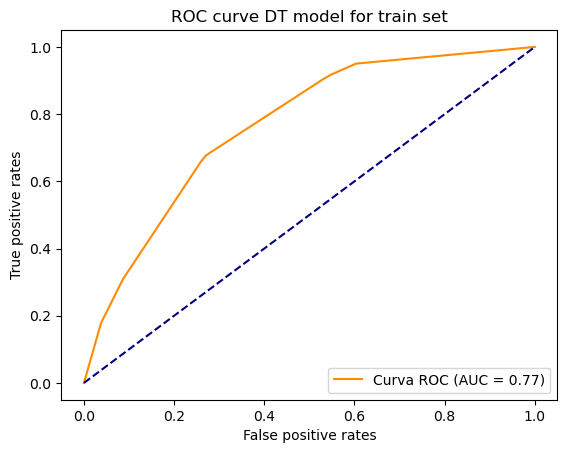

In [152]:
# Plotting the roc curve 
plt.plot(fprtrainDT, tprtrainDT, color='darkorange', label='Curva ROC (AUC = %0.2f)' %roc_auctrainDT)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.title('ROC curve DT model for train set')
plt.legend(loc="lower right")
plt.show()

#### Acc, Sen, Espe, Prec for the DT algorith for the train set

In [153]:
# Calculate the values for the classifications from the confusion matrix
# True Positives
TP = cmtrainDT[1, 1]
# False Negatives
FN = cmtrainDT[1, 0]
# False Positives
FP = cmtrainDT[0, 1]
# True Negatives
TN = cmtrainDT[0, 0]

# Calculation of accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
# Calculation of precision
precision = TP / (TP + FP)
# Calculation of sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)
# Calculation of specificity (True Negative Rate)
specificity = TN / (TN + FP)

print("Accuracy is:", accuracy)
print("Precision is:", precision)
print("Sensitivity is:", sensitivity)
print("Specificity is:", specificity)

Accuracy is: 0.7031362596735282
Precision is: 0.7173240271284651
Sensitivity is: 0.6776561333665091
Specificity is: 0.728994381667824


### 6.2 Considering the costs of each type of error in this problem, select and justify the most adequate evaluation metric.

When discussing medical matters, it's crucial to consider both false positives and false negatives, but primarily the false negatives. If a patient is wrongly diagnosed as not having the disease when they actually do, they won't receive timely and appropriate treatment, potentially leading to their death. In our project, false negatives occur when the model predicts a low risk of the disease, but in reality, the risk is high.

For our case, sensitivity is the most suitable evaluation metric since it's imperative to address false negatives. However, it's also important to consider precision.

### 6.3 Select and justify the best algorithm using the evaluation metric selected and its performance in the training, validation, and test set. Analyze if the model is underfitting, overfitting, or just righ

The random forest algorithm is the best in terms of sensitivity because we want to reduce the number of false negatives. The average between the sensitivity for the 3 sets was 0.84 for the random forest algorith and the second best was 0.82 for the neural network algorithm.

### 6.4 Investigate how a random forest can be used to identify the most important predictor variables (feature selection). Using this random forest-based method, mention which predictor variables are the most important to predict a cardiovascular disease. Compare the result with the correlation analysis. In the presentation and report explain the method utilized. 

In [155]:
from sklearn.ensemble import RandomForestRegressor

# Predictor variables (features)
X = df_clean19.drop('Heart_Disease', axis=1)

# Target variable (what you want to predict)
y = df_clean19['Heart_Disease']

# Create an instance of the Random Forest regressor
rf = RandomForestRegressor()

# Fit the model to your data
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_

# Create a DataFrame with the importances and variable names
feature_importances = pd.DataFrame({'Variable': X.columns, 'Importance': importances})

# Sort the importances in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False).reset_index(drop=True)

# Calculate variable importances as percentages
total_importance = sum(feature_importances['Importance'])
feature_importances['Percentage'] = (feature_importances['Importance'] / total_importance) * 100

# Display the DataFrame with variables and their importances in percentage
print("\nThe importance of variables is:\n")

print(feature_importances[['Variable', 'Importance', 'Percentage']])

# Display the top 3 most important predictor variables
top_3_variables = feature_importances.head(3)

print("\nThe top 3 most important variables are:\n\n", top_3_variables)



The importance of variables is:

                                      Variable  Importance  Percentage
0                                          BMI    0.149234   14.923387
1                                  Height_(cm)    0.120987   12.098748
2                 Green_Vegetables_Consumption    0.114330   11.433039
3                            Fruit_Consumption    0.109890   10.988962
4                      FriedPotato_Consumption    0.105809   10.580890
5                                 Age_Category    0.082187    8.218683
6                          Alcohol_Consumption    0.073944    7.394379
7                               General_Health    0.065173    6.517297
8                                     Exercise    0.024256    2.425594
9                                    Arthritis    0.022492    2.249184
10                                  Depression    0.020270    2.027017
11                                Other_Cancer    0.020082    2.008194
12                                     Chec